# Biodiversity Analysis in National Parks

## Project Overview

This project analyzes two datasets containing information on National Parks and their resident species to identify patterns in biodiversity and conservation status.

The datasets utilized are:

- **"observations.csv"**: This dataset records species sightings across various national parks over a one-week period.
    - `scientific_name`: The unique scientific identifier for the observed species.
    - `park_name`: The name of the national park where the observation took place.
    - `observations`: The count of times a species was observed in the preceding 7 days.

- **"species_info.csv"**: This dataset provides detailed information about a wide array of species, including their classification and conservation status.
    - `category`: The broader taxonomic grouping of the species (e.g., Mammal, Bird).
    - `scientific_name`: The unique scientific identifier for each species.
    - `common_names`: Popular names associated with the species.
    - `conservation_status`: The conservation status assigned to the species (e.g., Endangered, Species of Concern).

*Note: These datasets were sourced from Codecademy.com and are based on real-world concepts, though the data itself is primarily simulated.*

## Key Insights from the Analysis

*General Observations:*
- While the total number of observations differs significantly among parks, the distribution of observations by conservation status shows remarkable consistency across all locations.
- Similarly, the proportion of observations for each species category is uniform across the parks.
- There is a general trend indicating that species with a more critical conservation status are observed less frequently.
- The number of observations for a species can potentially serve as an indicator of its conservation status: higher counts often suggest lower risk, while lower counts may imply higher risk.

*Findings on 'At Risk' vs. 'Not at Risk' Species:*
- Plant categories (Vascular and Nonvascular) exhibit the lowest percentage of species classified as 'At Risk'.
- Birds have the highest proportion of species designated as a 'Species of Concern'.
- No endangered species were found within the Reptile and Nonvascular Plant categories in this dataset.
- Mammals demonstrate the highest proportion of species categorized as 'At Risk' and, specifically, the highest proportion of endangered species.

*Detailed Insights into 'At Risk' Species:*
- Among the 'At Risk' groups, Fish have the highest percentage of endangered species.
- Aquatic species, including Amphibians and Fish, show elevated rates of endangerment and are generally more threatened compared to other categories. (Amphibians are the third most endangered group after Mammals).
- Birds, Reptiles, Vascular Plants, and Nonvascular Plants have a significant proportion of species listed as a 'Species of Concern' but a relatively low proportion of endangered species. This highlights potential areas for proactive conservation initiatives.

*Observations on 'Not at Risk' Species:*
- Vascular plants constitute a large majority (approximately 77%) of all species not classified as 'At Risk'.

*Statistical Conclusions:*
- Statistical analysis indicates that mammals have a significantly higher rate of endangerment compared to Birds, Nonvascular Plants, and Vascular Plants (with over 95% confidence).

---

## Section 1: Initial Data Exploration

Before commencing any analysis, it's crucial to understand the structure and content of the datasets provided.

1. Import the necessary Python libraries for data analysis and visualization.
2. Load the two CSV datasets, "observations.csv" and "species_info.csv", into separate pandas DataFrames, named `parks` and `species` respectively.
3. Display the first 10 rows of the `parks` DataFrame to get a preliminary view of its contents.
4. Display the first 10 rows of the `species` DataFrame to examine its structure.

In [8]:
# 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [9]:
# 2

parks = pd.read_csv('/content/observations.csv')
species = pd.read_csv('/content/species_info.csv')

In [10]:
# 3

print("First 10 rows of the 'parks' DataFrame:")
display(parks.head(10))

First 10 rows of the 'parks' DataFrame:


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [11]:
# 4

print("First 10 rows of the 'species' DataFrame:")
display(species.head(10))

First 10 rows of the 'species' DataFrame:


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


The first thing that stands out to me is in the ```species``` dataframe.  Without looking any deeper you can already see that it contains some missing values ('NaN').  In order to accurately work with this data, you'll need to clean up your dataframes.  Aside from that one column in the ```species``` dataframe, you aren't sure which columns may have missing data in either of the two dataframes, so you'll need to do some work to find out.

Let's focus on looking at your ```parks``` dataframe first!

5. Check to see if the ```parks``` dataframe contains any missing values.  Check column names and data types as well
6. Take a look at the summary statistics
7. find out how many species observations there are for each National Park

In [12]:
# 5

parks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [13]:
# 6

parks.describe(include='all')

,scientific_name,park_name,observations
count,23296,23296,23296.000000
unique,5541,4,NaN
top,Hypochaeris radicata,Great Smoky Mountains National Park,NaN
freq,12,5824,NaN
mean,NaN,NaN,142.287904
std,NaN,NaN,69.890532
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


In [14]:
# 7

parks.park_name.value_counts()

,count
park_name,
Great Smoky Mountains National Park,5824
Yosemite National Park,5824
Bryce National Park,5824
Yellowstone National Park,5824


You can see that the length of the dataframe is 23,296 rows long and that it has 3 columns, each with 0 missing values.  The column names are clean and easy to work with and you can also see the data types of each column make sense.

Looking at the output from code block #6, you can see that there are a lot of unique species within the dataframe (5541), but only 4 diferent National Parks.    

Since there isn't a lot of unique values, you can easily use ```.value_counts()``` on the dataframe to show that there is 5824 observations of species in each National Park.  

Though our data looks seemingly nice and tidy, we could further inspect the ```scientific_name``` column to see if there are any strange values that are hidden within the column that could effect the analysis.  An example of a strange value could be an empty string ("") or a string that says ```"NULL"``` or ```"NaN"```.  These would technically count as values but they should instead be classified as a missing value.

8. Pull some random samples of the ```scientific_name``` column, look over the values, and check to see if there are any entries that don't belong
  

In [15]:
# 8

for num in range(10):
    print(f'Sample {num + 1}')
    parks_sample = parks.scientific_name.sample(10) # sample size of 10 used to conserve space but 20-25 preferred
    print(parks_sample)
    print()

Sample 1
1707                     Pinus sabiniana
18501    Carex communis var. amplisquama
1757              Amphicarpaea bracteata
3410                 Gymnosteris parvula
11433                Empidonax hammondii
12065          Arnica parryi ssp. sonnei
3263                          Carex feta
13067          Pheucticus melanocephalus
6787                     Bromus vulgaris
14697             Dulichium arundinaceum
Name: scientific_name, dtype: object

Sample 2
6674             Antennaria plantaginifolia
4584                       Gentiana villosa
13276                    Staphylea trifolia
23224       Solidago speciosa var. speciosa
7517                    Sanicula canadensis
22597                  Aureolaria laevigata
16407                   Pentagramma pallida
2394              Rhododendron carolinianum
11820                  Dodecatheon jeffreyi
18500    Eriogonum umbellatum var. covillei
Name: scientific_name, dtype: object

Sample 3
13686           Tringa flavipes
19851    Depari

According to the samples, the data is good to go!

Time to check out the ```species``` dataframe!

9. Check to see if the ```species``` dataframe contains any missing values.  Check column names and data types as well
10. Take a look at the summary statistics
11. Find out how many species there are within each ```category```
12. Find out how many species there are within each ```conservation_status```
13. Find out the number of ```NaN``` values in the ```conservation_status``` column, and the percentage

In [16]:
# 9

species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [17]:
# 10

species.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Columba livia,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [18]:
# 11

species.category.value_counts()

,count
category,
Vascular Plant,4470
Bird,521
Nonvascular Plant,333
Mammal,214
Fish,127
Amphibian,80
Reptile,79


In [19]:
# 12

species.conservation_status.value_counts()

,count
conservation_status,
Species of Concern,161
Endangered,16
Threatened,10
In Recovery,4


In [20]:
# 13

nan_count = len(species[species.conservation_status.isnull() == True])
nan_percent = (len(species[species.conservation_status.isnull() == True]) / len(species)) * 100

print(f'NaN values in \'conservation_status\' column: {nan_count} out of {len(species)}')
print(f'Percentage of NaN values in \'conservation_status\' column: {round(nan_percent, 2)}%')

NaN values in 'conservation_status' column: 5633 out of 5824
Percentage of NaN values in 'conservation_status' column: 96.72%


Going through the summary statistics gives us plenty of insight into the data.  The ```conservation_status``` column is clearly missing a massive chunk of data,
96.72% actually.  But why is this data missing?  If you take a look at the unique values within the column, you can see that there are only 4 values, and all of them are associated with endangerment to some degree (output of code block #12).  With this knowledge, we can assume that the ```NaN``` values just mean that the species is not at risk of endangerment.  The values seem to be missing for a reason.

With this assumption, you can go ahead and fill in the missing values with an appropriate value.

---

# Section 2 - Cleaning the Data
Before creating any visualizations of the data, you first need to clean the data to make sure that our visualizations accurately represent what is happening within the dataset.

14. Fill in the ```NaN``` values in the ```conservation_status``` column with the string value ```"Not at risk"```

In [21]:
# 14

species.conservation_status.fillna('Not at Risk', inplace=True)
species.conservation_status.value_counts()

/tmp/ipython-input-21-1150394644.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  species.conservation_status.fillna('Not at Risk', inplace=True)


,count
conservation_status,
Not at Risk,5633
Species of Concern,161
Endangered,16
Threatened,10
In Recovery,4


After doing this, it wouldn't hurt to check the scientific name column for any duplicate values.  If you refer back to code block #10, you can see that the column does have some repeating values.  This should be looked into.

15. Figure out how many values are duplicates within the ```scientific_name``` column
16. Find out how many duplicate rows exist within the ```species``` dataframe, if any

In [22]:
# 15

dup = species.scientific_name.duplicated().sum()
print(f'Duplicated values in \'scientific_name\' column: {dup}')

Duplicated values in 'scientific_name' column: 283


In [23]:
# 16

dup = species.duplicated().sum()
print(f'Duplicated rows in \'species\' dataframe: {dup}')

Duplicated rows in 'species' dataframe: 0


So there aren't any duplicate rows within the ```species``` dataframe, but there are 283 duplicates within the ```scientific_name``` column of the ```species``` dataframe.  This may be due to the fact that more than one person recorded the same species and they recorded different numbers observed in the ```observations``` column.  Let's find out.

17. Experiment with the ```species``` dataframe and determine if these duplicate values should be dropped or not

In [24]:
# 17

species[species.scientific_name.duplicated()].head()

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,Not at Risk
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",Not at Risk
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",Not at Risk
3025,Mammal,Lutra canadensis,River Otter,Not at Risk


In [25]:
# 17 (Cont.)

species[species.scientific_name == 'Canis lupus']

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


This doesn't seem right.  This is the same mammal, recorded 3 times, and once with a different conservation status.  The only sensible explanation for the repeated entries could be due to a possible change in conservation status.  If that is the case, then we can rest knowing it was recorded for a reason.

In [26]:
# 17 (Cont.)

species[species.scientific_name == 'Cervus elaphus']

,category,scientific_name,common_names,conservation_status
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not at Risk
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,Not at Risk


In [27]:
# 17 (Cont.)

species[species.scientific_name == 'Puma concolor']

,category,scientific_name,common_names,conservation_status
16,Mammal,Puma concolor,Panther (Mountain Lion),Not at Risk
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",Not at Risk
4451,Mammal,Puma concolor,Mountain Lion,Not at Risk


Ok, no rest for us, but you can conclude that a changing conservation status is NOT the reason for the duplicate values, and this is comforting, sort of.  It is safe to assume that the duplicates within the dataframe were recorded by different people who each had slightly different common names for the species.  To accurately plot any data, you'll need to drop the duplicates since they will do nothing for you but scew your results ever so slightly.

18. Drop duplicates in the ```scientific_name``` column of the ```species``` dataframe

In [28]:
species.drop_duplicates(subset=['scientific_name'], inplace=True)
dup = species.scientific_name.duplicated().sum()
print(f'Duplicated values in \'scientific_name\' column: {dup}')

Duplicated values in 'scientific_name' column: 0


18. Find out how many duplicate rows exist within the ```parks``` dataframe, if any
19. If so, drop the duplicated rows, you don't need any identical rows

In [29]:
# 18

parks.duplicated().sum()

np.int64(15)

In [30]:
# 19

print(f'Before dropping duplicates: {len(parks)}')
parks.drop_duplicates(inplace=True)
print(f'After dropping duplicates: {len(parks)}')
print(f'Number of values dropped: {15}')

Before dropping duplicates: 23296
After dropping duplicates: 23281
Number of values dropped: 15


20. The same ```scientific_name``` shouldn't be recorded at the same ```park_name``` more than once.  Find out how many duplicates you have when you check the duplicates between ```scientific_name``` and ```park_name```
21. There is a lot of duplicates.  Experiment with the ```parks``` dataframe and determine if these duplicate values should be dropped or not

In [31]:
# 20

dup = parks[['scientific_name', 'park_name']].duplicated().sum()
print(f'Duplicates: {dup}')

Duplicates: 1117


In [32]:
# 21

parks[parks[['scientific_name', 'park_name']].duplicated()]

,scientific_name,park_name,observations
483,Agrostis gigantea,Yellowstone National Park,235
490,Agrostis mertensii,Yosemite National Park,128
945,Rumex crispus,Yellowstone National Park,255
1213,Dianthus barbatus,Bryce National Park,110
1259,Riparia riparia,Bryce National Park,91
...,...,...,...
23258,Microtus longicaudus,Yellowstone National Park,244
23259,Agrostis scabra,Bryce National Park,118
23267,Oxalis corniculata,Yosemite National Park,164
23273,Dactylis glomerata,Bryce National Park,89


In [33]:
# 21 (Cont.)

parks[parks.scientific_name == 'Agrostis gigantea']

,scientific_name,park_name,observations
449,Agrostis gigantea,Yellowstone National Park,253
483,Agrostis gigantea,Yellowstone National Park,235
6824,Agrostis gigantea,Bryce National Park,104
7763,Agrostis gigantea,Great Smoky Mountains National Park,93
8676,Agrostis gigantea,Bryce National Park,116
11602,Agrostis gigantea,Great Smoky Mountains National Park,57
13907,Agrostis gigantea,Yosemite National Park,148
17535,Agrostis gigantea,Yosemite National Park,128


In [34]:
# 21 (Cont.)

parks[parks.scientific_name == 'Oxalis corniculata']

,scientific_name,park_name,observations
415,Oxalis corniculata,Bryce National Park,92
10750,Oxalis corniculata,Bryce National Park,82
12378,Oxalis corniculata,Yosemite National Park,153
14294,Oxalis corniculata,Great Smoky Mountains National Park,91
18638,Oxalis corniculata,Yellowstone National Park,249
20252,Oxalis corniculata,Great Smoky Mountains National Park,73
21746,Oxalis corniculata,Yellowstone National Park,223
23267,Oxalis corniculata,Yosemite National Park,164


22. The duplicates should definitely be dropped, but which ones?  Some have higher ```observations``` values than others.  The best course of action would be to set the values within the observations column to the average number of observations for each duplicate ```scientific_name``` and ```park_name```.  Let's do just that

In [35]:
# 22

duplicated_name_and_park = parks[parks[['scientific_name', 'park_name']].duplicated()].reset_index(drop=True)

for i in range(len(duplicated_name_and_park)):

    scientific_name = duplicated_name_and_park.scientific_name.iloc[i]
    park_name = duplicated_name_and_park.park_name.iloc[i]

    duplicate = parks[(parks.scientific_name == scientific_name) & (parks.park_name == park_name)]
    avg_observation = int(duplicate.observations.mean())

    mask = parks[(parks.scientific_name == scientific_name) & (parks.park_name == park_name)]

    parks.loc[mask.index, 'observations'] = avg_observation

Let's check some duplicates to make sure our conversions worked

In [36]:
# 22 (Cont.)

parks[parks.duplicated()].head()

,scientific_name,park_name,observations
483,Agrostis gigantea,Yellowstone National Park,244
490,Agrostis mertensii,Yosemite National Park,131
945,Rumex crispus,Yellowstone National Park,255
1213,Dianthus barbatus,Bryce National Park,97
1259,Riparia riparia,Bryce National Park,89


In [37]:
# 22 (Cont.)

parks[(parks.scientific_name == 'Agrostis gigantea') & (parks.park_name == 'Yellowstone National Park')]

,scientific_name,park_name,observations
449,Agrostis gigantea,Yellowstone National Park,244
483,Agrostis gigantea,Yellowstone National Park,244


In [38]:
# 22 (Cont.)

parks[(parks.scientific_name == 'Riparia riparia') & (parks.park_name == 'Bryce National Park')]

,scientific_name,park_name,observations
872,Riparia riparia,Bryce National Park,89
1259,Riparia riparia,Bryce National Park,89


Everything checks out!  The duplicate ```scientific_name``` and ```park_name``` values now have duplicate ```observations``` values as well, which are equal to the average of the observations between the duplicates.  Now we can simply just drop the duplicate rows of the dataframe since they are equal.

23. Now that the values have been correctly updated, you can drop the duplicates

In [39]:
# 23

print(f'Number of duplicates: {parks.duplicated().sum()}')

before = len(parks)
print(f'Length before dropping duplicates: {before}')

parks.drop_duplicates(inplace=True)

after = len(parks)
print(f'Length after dropping duplicates: {after}')

print(f'Difference between before and after: {before} - {after} = {before - after} duplicates dropped')
print(f'Duplicates in dataframe: {parks.duplicated().sum()}')

dup = parks[['scientific_name', 'park_name']].duplicated().sum()
print(f'Duplicates between \'scientific_name\' and \'park_name\' columns: {dup}')

Number of duplicates: 1117
Length before dropping duplicates: 23281
Length after dropping duplicates: 22164
Difference between before and after: 23281 - 22164 = 1117 duplicates dropped
Duplicates in dataframe: 0
Duplicates between 'scientific_name' and 'park_name' columns: 0


Perfect!  Now the ```parks``` dataframe contains each species number of observations ONCE per park.

The ```species``` and ```parks``` dataframes cleaned up and ready for further analysis!

24. Do a final summary statistics check on the ```species``` dataframe
25. Do a final summary statistics check on the ```parks``` dataframe

In [40]:
# 24

species.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5541 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5541 non-null   object
 1   scientific_name      5541 non-null   object
 2   common_names         5541 non-null   object
 3   conservation_status  5541 non-null   object
dtypes: object(4)
memory usage: 216.4+ KB


In [41]:
# 24 (Cont.)

species.describe(include='all')

,category,scientific_name,common_names,conservation_status
count,5541,5541,5541,5541
unique,7,5541,5229,5
top,Vascular Plant,Tribulus terrestris,Brachythecium Moss,Not at Risk
freq,4262,1,7,5363


In [42]:
# 25

parks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22164 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  22164 non-null  object
 1   park_name        22164 non-null  object
 2   observations     22164 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 692.6+ KB


In [43]:
# 25 (Cont.)

parks.describe(include='all')

,scientific_name,park_name,observations
count,22164,22164,22164.000000
unique,5541,4,NaN
top,Dichanthelium depauperatum,Great Smoky Mountains National Park,NaN
freq,4,5541,NaN
mean,NaN,NaN,142.302472
std,NaN,NaN,69.806198
min,NaN,NaN,9.000000
25%,NaN,NaN,86.000000
50%,NaN,NaN,124.000000
75%,NaN,NaN,195.000000


The dataframes look great!  Each dataframe contains 0 null values and 5541 unique values for the ```scientific_name``` column.  The only time there will be a duplicate ```scientific_name``` value in the ```parks``` dataframe is when the scientific name corresponds to a different ```park_name``` value.  Therefore, since there are four unique ```park_name``` values, there can be a maximum of four identical ```scientific_name``` values corresponding to a different unique ```park_name``` value with each occurance.

The final step you need to take before looking further into the data is to merge the two dataframes.  This will make plotting our findings much easier.

26. Merge the ```species``` and ```parks``` dataframes by inner merging ```species``` onto ```parks```

In [44]:
# 26

parks_species = parks.merge(species)

In [45]:
# 26

parks_species.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not at Risk
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not at Risk
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Not at Risk
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Not at Risk
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Not at Risk


By inner merging ```species``` onto ```parks```, the dataframe merges on the common columns, which in this case, was the ```scientific_name``` column.  

Time to move into further exploration of the data!

---

# Section 3 - Exploring the Data - Part 1
### _Conservation Statuses within Different Parks_
With a \'tidy\' pair of dataframes, you can now dive into deeper exploration of the data.

In this analysis, you want to find out if there are any common factors amongst endangered species in order to prevent other species becoming endangered in the future.  For this section, the focus will be on the observations of different conservation statuses within different parks.

27. Find out which parks have the highest amount of \'Not at Risk\' species
28. Look at the total observations for all ```conservation_status``` values within every park

In [46]:
# 27

not_at_risk = parks_species[parks_species.conservation_status == 'Not at Risk']

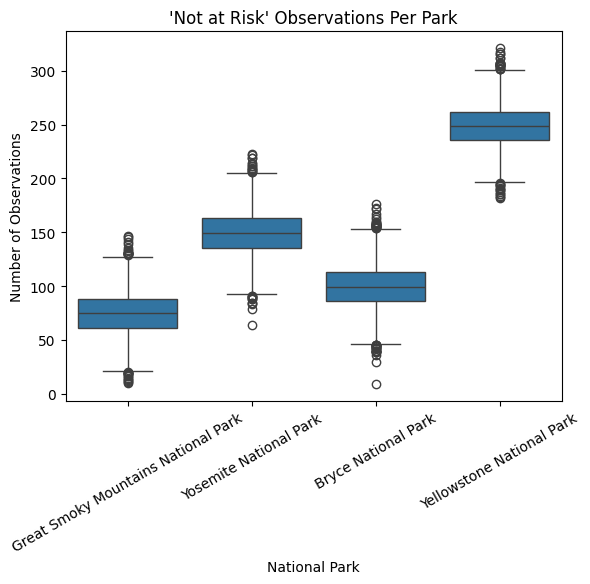

<Figure size 640x480 with 0 Axes>

In [47]:
# 27

sns.boxplot(data=not_at_risk, x='park_name', y='observations')
ax = plt.subplot()
ax.set_xticks(range(len(not_at_risk.park_name.unique())))
ax.set_xticklabels(not_at_risk.park_name.unique(), rotation=30)
plt.title('\'Not at Risk\' Observations Per Park')
plt.xlabel('National Park')
plt.ylabel('Number of Observations')
plt.show()
plt.clf()

You can see that the highest number of 'Not at Risk' species observations is in Yellowstone National Park.  This chart is really just for curiousity because this doesn't necessarily mean that Yellowstone is a 'safer' park for a particular species.  This could be for a variety of reasons such as the park could being larger than the other parks or the park having a larger species population, etc.

In [48]:
# 28

observations_per_park = parks_species.groupby(['park_name', 'conservation_status']).observations.sum().reset_index()

In [49]:
# 28 (Cont.)

observations_per_park_pivot = observations_per_park.pivot(
  index='park_name',
  columns='conservation_status',
  values='observations'
)

In [50]:
# 28 (Cont.)

observations_per_park_pivot

conservation_status,Endangered,In Recovery,Not at Risk,Species of Concern,Threatened
park_name,,,,,
Bryce National Park,402,258,533093,13979,427
Great Smoky Mountains National Park,294,189,400343,9659,340
Yellowstone National Park,1008,559,1337313,33569,1087
Yosemite National Park,616,386,799611,20187,672


In [51]:
# 28 (Cont.)

# Using .sum() and specifying axis 1 will add up all the values across the rows instead of down the columns

observations_per_park_pivot.sum(axis=1)

,0
park_name,
Bryce National Park,548159
Great Smoky Mountains National Park,410825
Yellowstone National Park,1373536
Yosemite National Park,821472


Now that you have a pivot table, you can see the total population for every conservation status in every national park.  In order to learn more from the pivot table, you can calculate the total observations for every conservation status and then find the percentages of the different conservation statuses within each park.

You don't just want to make calculations, it would be nice to save the calculations into a variable as well.  You can update the entire pivot table into percentages but this would alter the currrent pivot table.  To avoid this, create a new variable and use the ```.copy()``` method to make a copy of the original pivot table.  If you don't use the ```.copy()``` method, then any alterations applied to the new pivot table variable will also apply to the original, though it is not directly referenced.

29. Create a copy of the original pivot table using ```.copy()```
30. Update the new pivot table variable with percentages for every conservation status in each park

In [52]:
# 29

observations_per_park_pivot_percent = observations_per_park_pivot.copy()

In [53]:
# 30

bryce_park_total = [observations_per_park_pivot.sum(axis=1).index[0], observations_per_park_pivot.sum(axis=1)[0]]
smokies_park_total = [observations_per_park_pivot.sum(axis=1).index[1], observations_per_park_pivot.sum(axis=1)[1]]
yellowstone_park_total = [observations_per_park_pivot.sum(axis=1).index[2], observations_per_park_pivot.sum(axis=1)[2]]
yosemite_park_total = [observations_per_park_pivot.sum(axis=1).index[3], observations_per_park_pivot.sum(axis=1)[3]]

print(bryce_park_total)
print(smokies_park_total)
print(yellowstone_park_total)
print(yosemite_park_total)

park_list = [bryce_park_total, smokies_park_total, yellowstone_park_total, yosemite_park_total]

['Bryce National Park', np.int64(548159)]
['Great Smoky Mountains National Park', np.int64(410825)]
['Yellowstone National Park', np.int64(1373536)]
['Yosemite National Park', np.int64(821472)]


In [54]:
# 30 (Cont.)

for i in range(len(observations_per_park_pivot_percent.index)):
    observations_per_park_pivot_percent.iloc[i] = observations_per_park_pivot_percent.iloc[i].apply(lambda x: str(round((x / park_list[i][1]) * 100, 3)) + '%')

In [55]:
# 30 (Cont.)

observations_per_park_pivot_percent

conservation_status,Endangered,In Recovery,Not at Risk,Species of Concern,Threatened
park_name,,,,,
Bryce National Park,0.073%,0.047%,97.252%,2.55%,0.078%
Great Smoky Mountains National Park,0.072%,0.046%,97.449%,2.351%,0.083%
Yellowstone National Park,0.073%,0.041%,97.363%,2.444%,0.079%
Yosemite National Park,0.075%,0.047%,97.339%,2.457%,0.082%


In [56]:
# 30 (Cont.)

observations_per_park_pivot

conservation_status,Endangered,In Recovery,Not at Risk,Species of Concern,Threatened
park_name,,,,,
Bryce National Park,402,258,533093,13979,427
Great Smoky Mountains National Park,294,189,400343,9659,340
Yellowstone National Park,1008,559,1337313,33569,1087
Yosemite National Park,616,386,799611,20187,672


Now you have two seperate pivot tables, one with the number of observations per park, and one with the percentage of observations per park!

What is the takeaway from doing this though?  

Well, take a look at the pivot table directly above, with the number of observations.  It looks as if the 'safest' park for wildlife is Yellowstone.  It also looks like that is the 'most dangerous' park for wildlife as well.  It's hard to interpret what you're really looking at.  This is why you created the pivot table containing percentages instead!

Look at the pivot table above the one with the number of observations, the one that contains the decimal numbers as values (The percentages).  There is an incredibly small amount of variation between the percentages of each conservation status within each park.  

Findings:
- ```There are near equal proportions of each conservation status within each park.```

In the comparison of observations between conservation statuses within different parks, we can conclude that they are relatively equal.  The good thing is, there are other columns of data to still explore, and you have learned something important about the data that can be used moving forward.

---

# Section 3 - Exploring the Data - Part 2
### _Plotting the Proportions_

For most of the plots you'll make throughout the analysis you'll need to use a dataframe that excludes the 'Not at Risk' ```conservation_status``` value.  This is due to the fact that the proportion of species that are 'Not at Risk' exceeds the other ```conservation_status``` values by so much that the graphs/charts can't be read.  This is fine, as long as we understand the actual proportions of the data with the 'Not at Risk' values included.

31. Plot an example of keeping the 'Not at Risk' values in your graphs/charts
32. Create a dataframe that excludes the 'Not at Risk' values

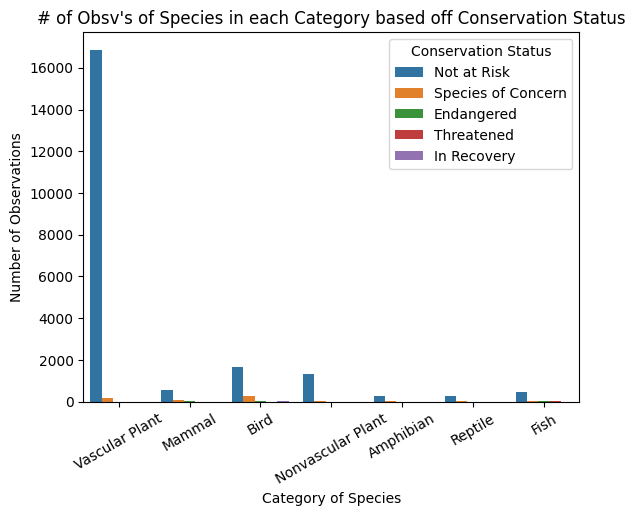

<Figure size 640x480 with 0 Axes>

In [57]:
# 31

sns.countplot(data=parks_species, x='category', hue='conservation_status')
ax = plt.subplot()
ax.set_xticks(range(len(parks_species.category.unique())))
ax.set_xticklabels(parks_species.category.unique(), rotation=30)
plt.title('# of Obsv\'s of Species in each Category based off Conservation Status')
plt.ylabel('Number of Observations')
plt.xlabel('Category of Species')
plt.legend(title='Conservation Status')
plt.show()
plt.clf()

Not much to see here!  Let's fix that!

In [58]:
# 32

pk_sp_nar_excluded = parks_species[parks_species.conservation_status != 'Not at Risk']
pk_sp_nar_included = parks_species[parks_species.conservation_status == 'Not at Risk']

print(f'Length of original dataframe: {len(parks_species)}')
print(f'Length of dataframe including \'Not at Risk\' values only: {len(pk_sp_nar_included)}')
print(f'Length of dataframe excluding \'Not at Risk\': {len(pk_sp_nar_excluded)}')
print(f'Length after adding the included and excluded dataframes: {len(pk_sp_nar_excluded) + len(pk_sp_nar_included)}')


Length of original dataframe: 22164
Length of dataframe including 'Not at Risk' values only: 21452
Length of dataframe excluding 'Not at Risk': 712
Length after adding the included and excluded dataframes: 22164


In [59]:
# 32 (Cont.)

pk_sp_nar_excluded.conservation_status.value_counts()

,count
conservation_status,
Species of Concern,604
Endangered,60
Threatened,36
In Recovery,12


You now have a dataframe that will be easier to plot with!  

Time for some visualizations!

33. Make a figure showing the proportions of observations for each conservation status within each park

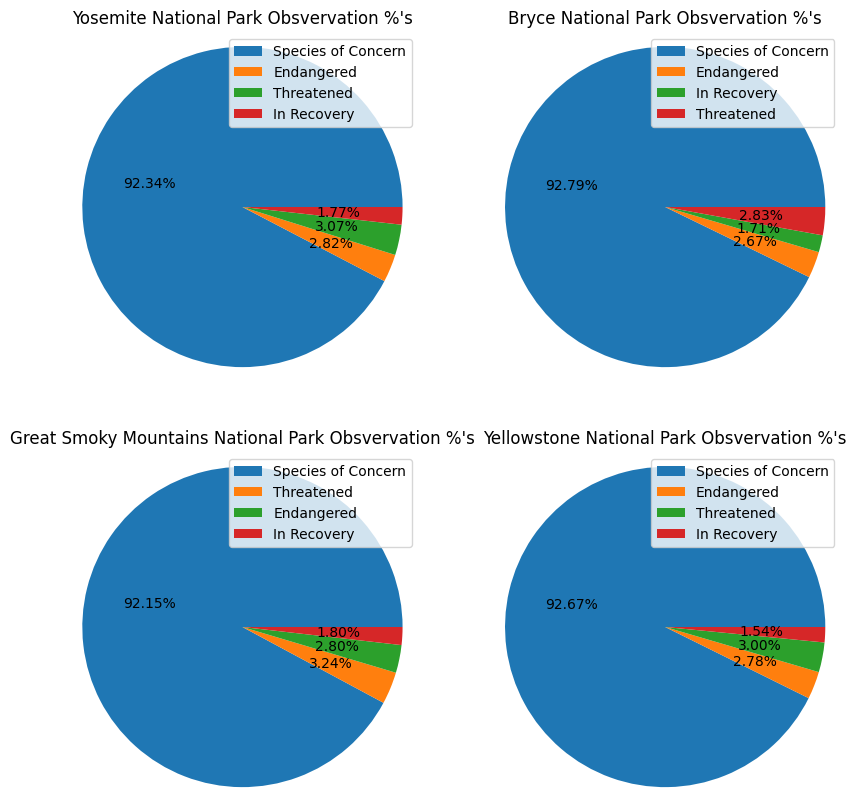

<Figure size 640x480 with 0 Axes>

In [60]:
# 33

plt.figure(figsize=(10, 10))

for i in range(len(pk_sp_nar_excluded.park_name.unique())):

  park_df = pk_sp_nar_excluded[pk_sp_nar_excluded.park_name == pk_sp_nar_excluded.park_name.unique()[i]]
  park_df = park_df[['conservation_status', 'observations']]
  park_df = park_df.groupby('conservation_status', sort=False).observations.sum()
  pie_labels = park_df.index

  plt.subplot(2, 2, i + 1)
  plt.pie(park_df, autopct='%0.2f%%')
  plt.axis('equal')
  plt.title(f'{pk_sp_nar_excluded.park_name.unique()[i]} Obsvervation %\'s')
  plt.legend(pie_labels)

plt.show()
plt.clf()

In creating four separate pie charts, one for each park, you can see that the percentage of observations for each conservation status was nearly identical in each park.  This is basically the same as the pivot table earlier but without the 'Not at Risk' conservation status included.  You can see that the majority of species who are at some sort of risk, fall under the category of 'Species of Concern'.

The figure above is just another way to show our finding from the pivot table earlier.  

Moving on from the proportions!  

You're curious if there is a relationship between conservation status and the amount of observations recorded for a specific species.

34. Make a plot that shows the relationship between ```conservation_status``` and ```observations```

In [61]:
# 34

pk_sp_nar_excluded.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
24,Zizia trifoliata,Yosemite National Park,135,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
36,Camissonia sierrae ssp. alticola,Bryce National Park,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
71,Tofieldia glabra,Great Smoky Mountains National Park,75,Vascular Plant,"Smooth Bog-Asphodel, Smooth Tofieldia",Species of Concern
94,Accipiter cooperii,Bryce National Park,95,Bird,Cooper's Hawk,Species of Concern
118,Dichanthelium acuminatum var. acuminatum,Yosemite National Park,123,Vascular Plant,Tapered Rosette Grass,Species of Concern


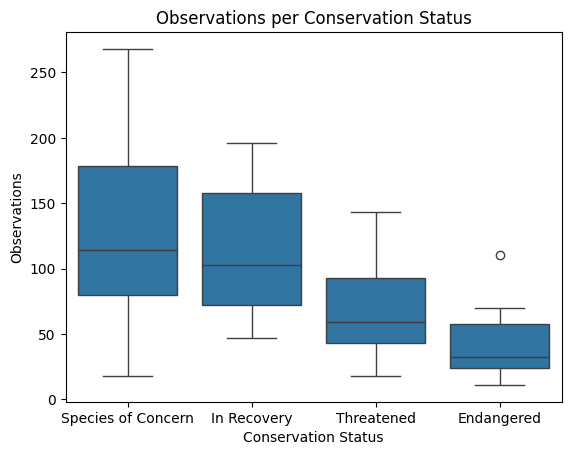

<Figure size 640x480 with 0 Axes>

In [62]:
# 34 (Cont.)

sns.boxplot(data=pk_sp_nar_excluded.sort_values(by='observations', ascending=False), x='conservation_status', y='observations')
plt.title('Observations per Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Observations')
plt.show()
plt.clf()

You can see a clear trend in the boxplot above.  The conservation statuses are ordered from the least severe to most severe situation.  The graph shows that, on average, as the severity of conservation status increases, the average observations of a particular species decreases.  This is likely due to the fact that, as a species moves closer to endangerment, or extinction, there are less of that species to be seen in the wild, of course.

We can conclude that...

- ```On average, as the severity of the conservation status increases for a specific species, the sightings of that specific species decreases```

This could also be looked at inversely, where one could assume a species conservation status based off of that species number of observations.

---

# Section 3 - Exploring the Data - Part 3
### _Categories of species_
The focus of this section will be directed towards the different categories of species and the conservation statuses of those species.

35. First, create a new variable that contains only the parts of the dataframe that you'll need to use for this section of the analysis

In [63]:
# 35

pk_sp_nar_excluded.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
24,Zizia trifoliata,Yosemite National Park,135,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
36,Camissonia sierrae ssp. alticola,Bryce National Park,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
71,Tofieldia glabra,Great Smoky Mountains National Park,75,Vascular Plant,"Smooth Bog-Asphodel, Smooth Tofieldia",Species of Concern
94,Accipiter cooperii,Bryce National Park,95,Bird,Cooper's Hawk,Species of Concern
118,Dichanthelium acuminatum var. acuminatum,Yosemite National Park,123,Vascular Plant,Tapered Rosette Grass,Species of Concern


In [64]:
# 35 (Cont.)

# Dataframe without 'Not at Risk'
category_df = pk_sp_nar_excluded[['scientific_name', 'park_name', 'category', 'conservation_status']]
category_df.head()

,scientific_name,park_name,category,conservation_status
24,Zizia trifoliata,Yosemite National Park,Vascular Plant,Species of Concern
36,Camissonia sierrae ssp. alticola,Bryce National Park,Vascular Plant,Species of Concern
71,Tofieldia glabra,Great Smoky Mountains National Park,Vascular Plant,Species of Concern
94,Accipiter cooperii,Bryce National Park,Bird,Species of Concern
118,Dichanthelium acuminatum var. acuminatum,Yosemite National Park,Vascular Plant,Species of Concern


Great, you won't need the ```common_names``` or ```observations``` columns moving foward.

Let's better understand the relationship between category of species and conservation status with some visualizations!

36. Plot the number of unique 'At Risk' species for each conservation status in each category

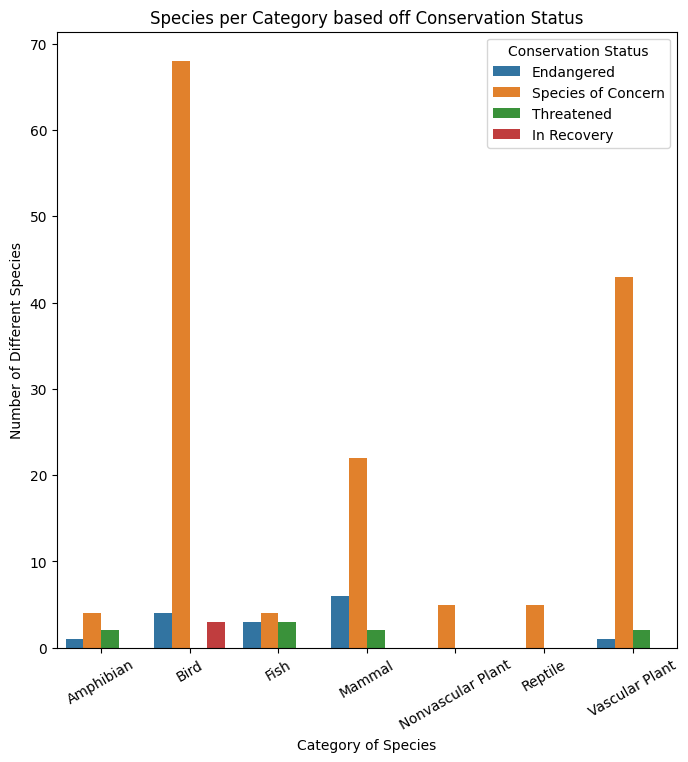

<Figure size 640x480 with 0 Axes>

In [65]:
# 36

# Have to drop duplicates or each scientific name will be counted 4 times each
category_status_species = category_df.drop_duplicates(subset=['scientific_name'])

category_status_species = category_status_species.groupby(['category', 'conservation_status']).scientific_name.count().reset_index()

plt.figure(figsize=(8, 8))
sns.barplot(data=category_status_species, x='category', y='scientific_name', hue='conservation_status')
ax = plt.subplot()
ax.set_xticks(range(len(category_status_species.category.unique())))
ax.set_xticklabels(category_status_species.category.unique(), rotation=30)
plt.title('Species per Category based off Conservation Status')
plt.ylabel('Number of Different Species')
plt.xlabel('Category of Species')
plt.legend(title='Conservation Status', loc='upper right')
plt.show()
plt.clf()

You can clearly see some major differences between the categories of species!  

If you were to rank the categories from greatest to least by how much attention each category needs, then the ranking would be as follows...

1. ```Bird``` (Huge concern for nearly the entire category of species)
2. ```Vascular Plant``` (Huge concern for nearly the entire category of species)
3. ```Mammal``` (Has the most endangered species but far less species who are of concern)
4. ```Fish``` (Moderate concern)
5. ```Amphibian``` (Moderate concern)
6. ```Nonvascular Plant``` & ```Reptile``` (No Reptiles or Nonvascular Plants are endangered and very few are of concern)

Let's see if there is an inverse relationship when you plot the number of species which are not at risk.

37. Plot the number of unique 'Not at Risk' species for each conservation status in each category (For comparison)

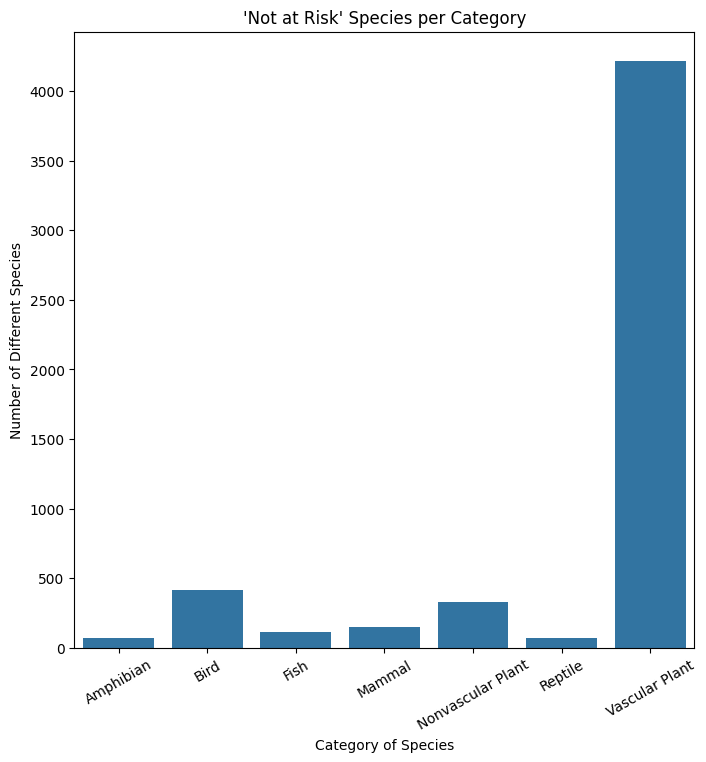

<Figure size 640x480 with 0 Axes>

In [66]:
# 37

# Dataframe with 'Not at Risk' included
category_nar_df = pk_sp_nar_included[['scientific_name', 'park_name', 'category', 'conservation_status']]

# Have to drop duplicates or each scientific name will be counted 4 times each
nar_category_status_species = category_nar_df.drop_duplicates(subset=['scientific_name'])

nar_category_status_species = nar_category_status_species.groupby(['category', 'conservation_status']).scientific_name.count().reset_index()

plt.figure(figsize=(8, 8))
sns.barplot(data=nar_category_status_species, x='category', y='scientific_name')
ax = plt.subplot()
ax.set_xticks(range(len(nar_category_status_species.category.unique())))
ax.set_xticklabels(nar_category_status_species.category.unique(), rotation=30)
plt.title('\'Not at Risk\' Species per Category')
plt.ylabel('Number of Different Species')
plt.xlabel('Category of Species')
plt.show()
plt.clf()

The plot doesn't show us too much but it does show us that there is a very large amount of Vascular Plant species.  You could spend some time making assumptions and thinking about totals and percentages based off of these two graphs, but a better idea would be to make another pivot table!

These graphs will be more informative if we can understand the proportions of the total number of species within each category.

38. Create a pivot table that includes all the counts for all the conservation statuses ('Not at Risk' as well) in each category and create visualizations for the pivot table

In [67]:
# 38

parks_species_cat = parks_species[['scientific_name', 'park_name', 'category', 'conservation_status']]

parks_species_cat = parks_species_cat.drop_duplicates(subset=['scientific_name'])

parks_species_cat = parks_species_cat.groupby(['category', 'conservation_status']).scientific_name.count().reset_index()

parks_species_cat_pivot = parks_species_cat.pivot(
    index='category',
    columns='conservation_status',
    values='scientific_name'
)

parks_species_cat_pivot.fillna(0.0, inplace=True)

parks_species_cat_pivot

conservation_status,Endangered,In Recovery,Not at Risk,Species of Concern,Threatened
category,,,,,
Amphibian,1.0,0.0,72.0,4.0,2.0
Bird,4.0,3.0,413.0,68.0,0.0
Fish,3.0,0.0,115.0,4.0,3.0
Mammal,6.0,0.0,146.0,22.0,2.0
Nonvascular Plant,0.0,0.0,328.0,5.0,0.0
Reptile,0.0,0.0,73.0,5.0,0.0
Vascular Plant,1.0,0.0,4216.0,43.0,2.0


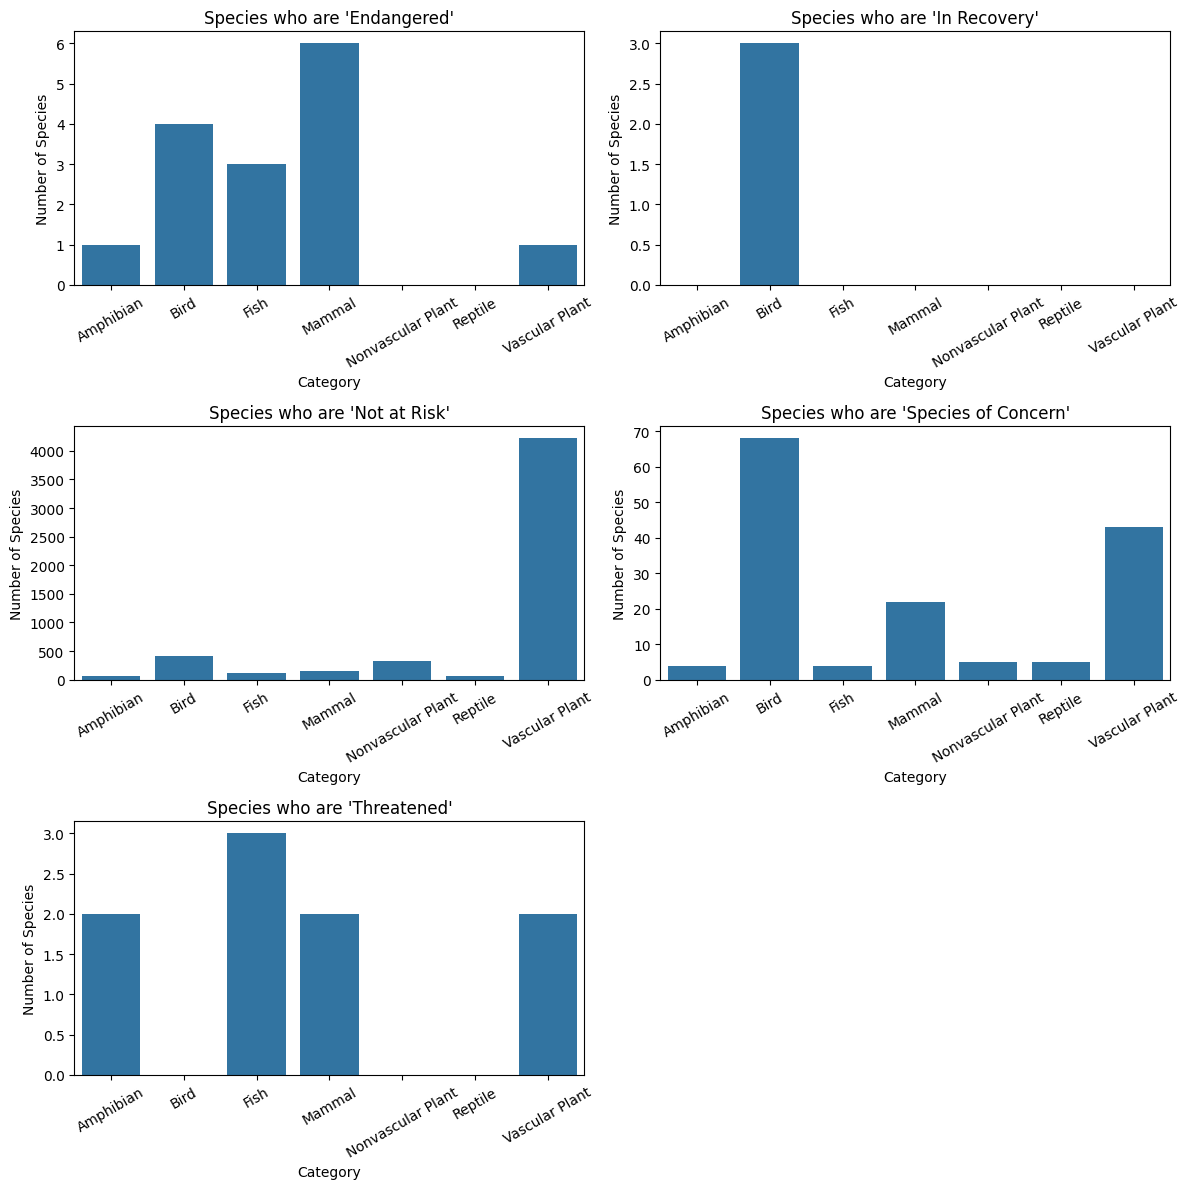

<Figure size 640x480 with 0 Axes>

In [68]:
# 38 (Cont.)

# Plotting the number of species per category within each conservation status

plt.figure(figsize=(12, 12))

for i in range(len(parks_species_cat_pivot.columns)):
  data = parks_species_cat_pivot[parks_species_cat_pivot.columns[i]].reset_index()

  plt.subplot(3, 2, i + 1)
  sns.barplot(x=data[data.columns[0]], y=data[data.columns[1]])
  plt.title(f'Species who are \'{data.columns[1]}\'')
  plt.xlabel('Category')
  plt.ylabel('Number of Species')
  ax = plt.subplot(3, 2, i + 1)
  ax.set_xticks(range(len(parks_species_cat_pivot.index)))
  ax.set_xticklabels(parks_species_cat_pivot.index, rotation=30)
  plt.tight_layout()

plt.show()
plt.clf()

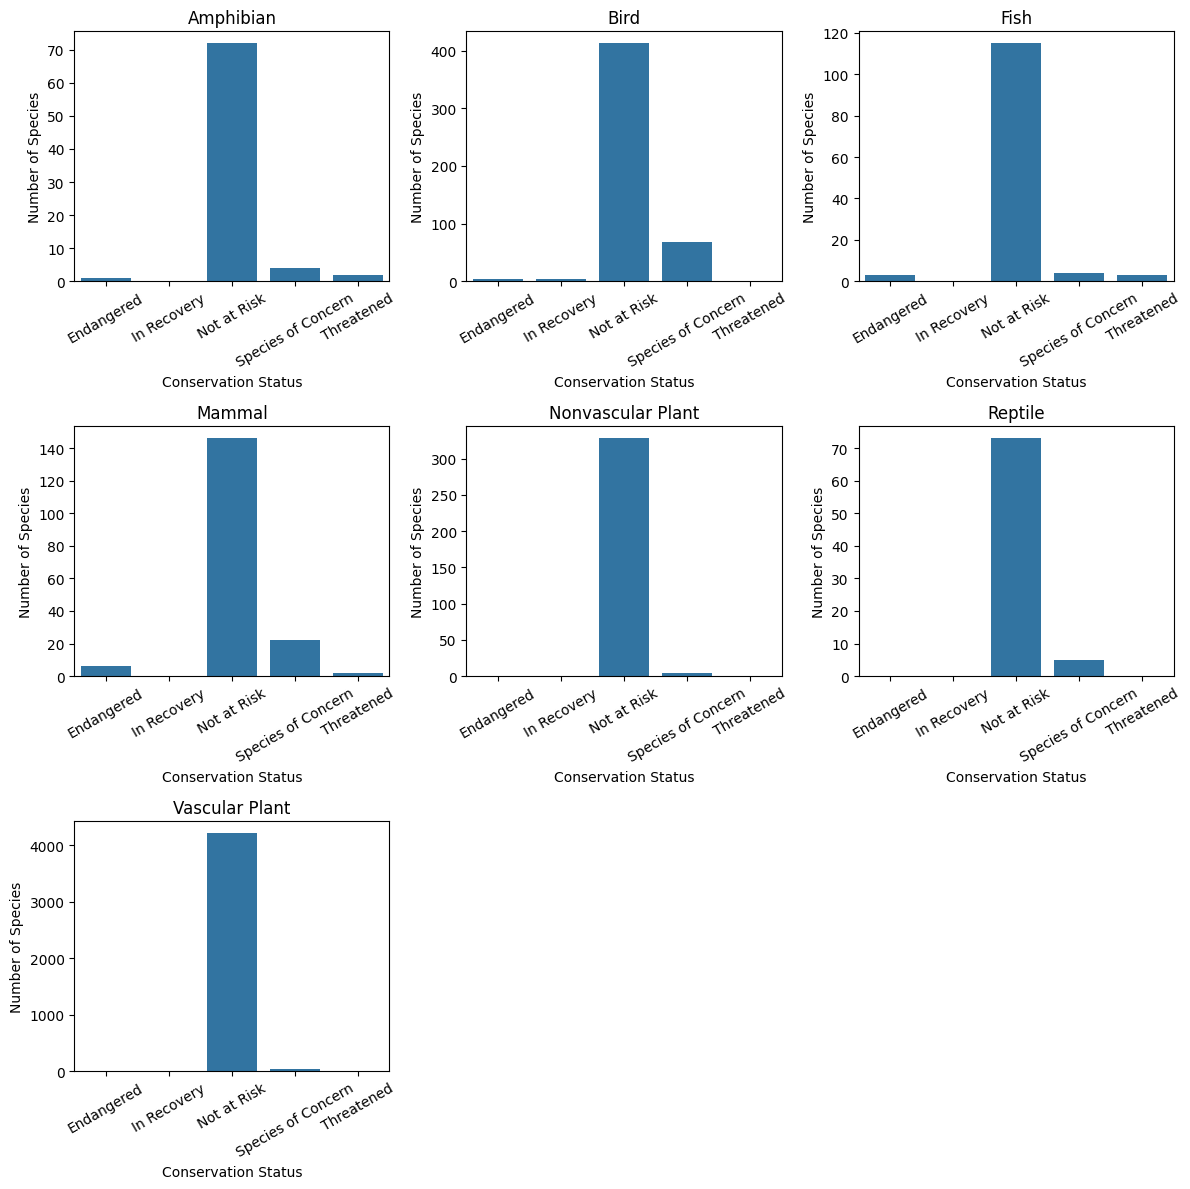

<Figure size 640x480 with 0 Axes>

In [69]:
# 38 (Cont.)

# Plotting the number of species per conservation status within each category

plt.figure(figsize=(12, 12))

for i in range(len(parks_species_cat_pivot.index)):
  data = parks_species_cat_pivot.iloc[i].reset_index()

  plt.subplot(3, 3, i + 1)
  sns.barplot(x=data[data.columns[0]], y=data[data.columns[1]])
  plt.title(f'{parks_species_cat_pivot.index[i]}')
  plt.xlabel('Conservation Status')
  plt.ylabel('Number of Species')
  ax = plt.subplot(3, 3, i + 1)
  ax.set_xticks(range(len(data.conservation_status)))
  ax.set_xticklabels(data.conservation_status, rotation=30)
  plt.tight_layout()

plt.show()
plt.clf()

Next, you want to find the totals of each category so you can calculate the proportions for the table.  You'll also create a copy of the pivot table above so that you don't alter the existing pivot table.

39. Create a pivot table of proportions from the pivot table above and create visualizations based off of the pivot table

In [70]:
# 39

parks_species_cat_pivot_props = parks_species_cat_pivot.copy()

for cat in parks_species_cat_pivot_props.index:

    cat_total = parks_species_cat_pivot_props.loc[cat].sum(axis=0)
    print(f'Total {cat} Species: {cat_total}')

    parks_species_cat_pivot_props.loc[cat] = parks_species_cat_pivot_props.loc[cat].apply(lambda x: str(round((x / cat_total) * 100, 2)) + '%')

parks_species_cat_pivot_props

Total Amphibian Species: 79.0
Total Bird Species: 488.0
Total Fish Species: 125.0
Total Mammal Species: 176.0
Total Nonvascular Plant Species: 333.0
Total Reptile Species: 78.0
Total Vascular Plant Species: 4262.0


conservation_status,Endangered,In Recovery,Not at Risk,Species of Concern,Threatened
category,,,,,
Amphibian,1.27%,0.0%,91.14%,5.06%,2.53%
Bird,0.82%,0.61%,84.63%,13.93%,0.0%
Fish,2.4%,0.0%,92.0%,3.2%,2.4%
Mammal,3.41%,0.0%,82.95%,12.5%,1.14%
Nonvascular Plant,0.0%,0.0%,98.5%,1.5%,0.0%
Reptile,0.0%,0.0%,93.59%,6.41%,0.0%
Vascular Plant,0.02%,0.0%,98.92%,1.01%,0.05%


In [71]:
# 39 (Cont.)

# Remove the '%' off of each value in the pivot table and convert values to floats for graphing

for cat in parks_species_cat_pivot_props.index:

    parks_species_cat_pivot_props.loc[cat] = parks_species_cat_pivot_props.loc[cat].apply(lambda x: float(x.strip('%')))

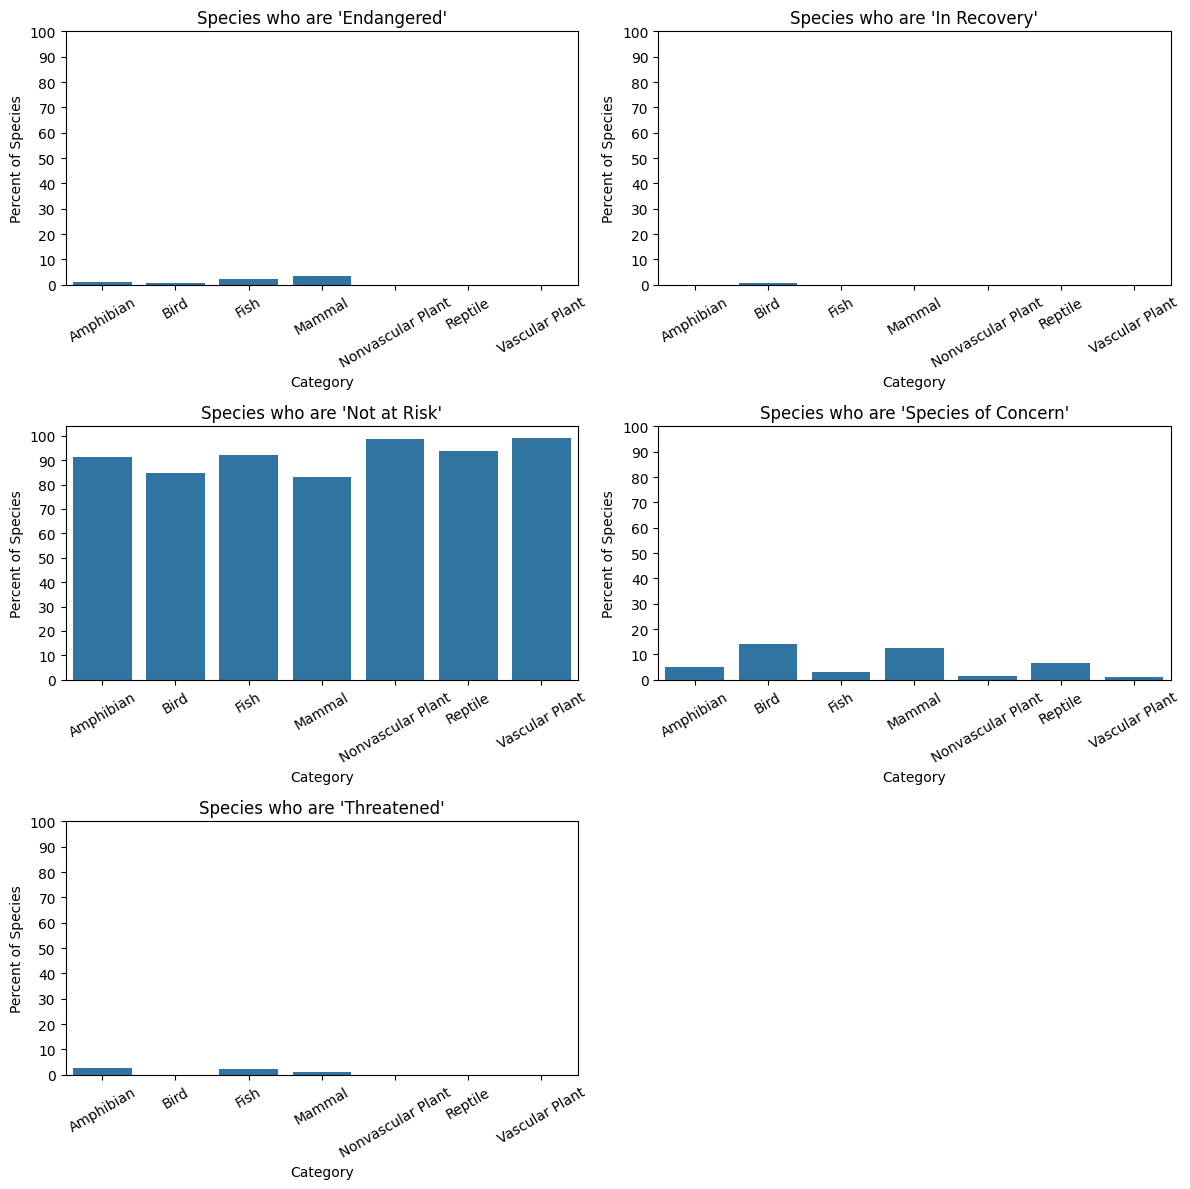

<Figure size 640x480 with 0 Axes>

In [72]:
# 39 (Cont.)

# Plotting the number of species per category within each conservation status

plt.figure(figsize=(12, 12))

for i in range(len(parks_species_cat_pivot_props.columns)):
  data = parks_species_cat_pivot_props[parks_species_cat_pivot_props.columns[i]].reset_index()

  plt.subplot(3, 2, i + 1)
  sns.barplot(x=data[data.columns[0]], y=data[data.columns[1]])
  plt.title(f'Species who are \'{data.columns[1]}\'')
  plt.xlabel('Category')
  plt.ylabel('Percent of Species')
  ax = plt.subplot(3, 2, i + 1)
  ax.set_xticks(range(len(parks_species_cat_pivot.index)))
  ax.set_xticklabels(parks_species_cat_pivot.index, rotation=30)
  ax.set_yticks(range(0, 110, 10))
  ax.set_yticklabels(range(0, 110, 10))
  plt.tight_layout()

plt.show()
plt.clf()

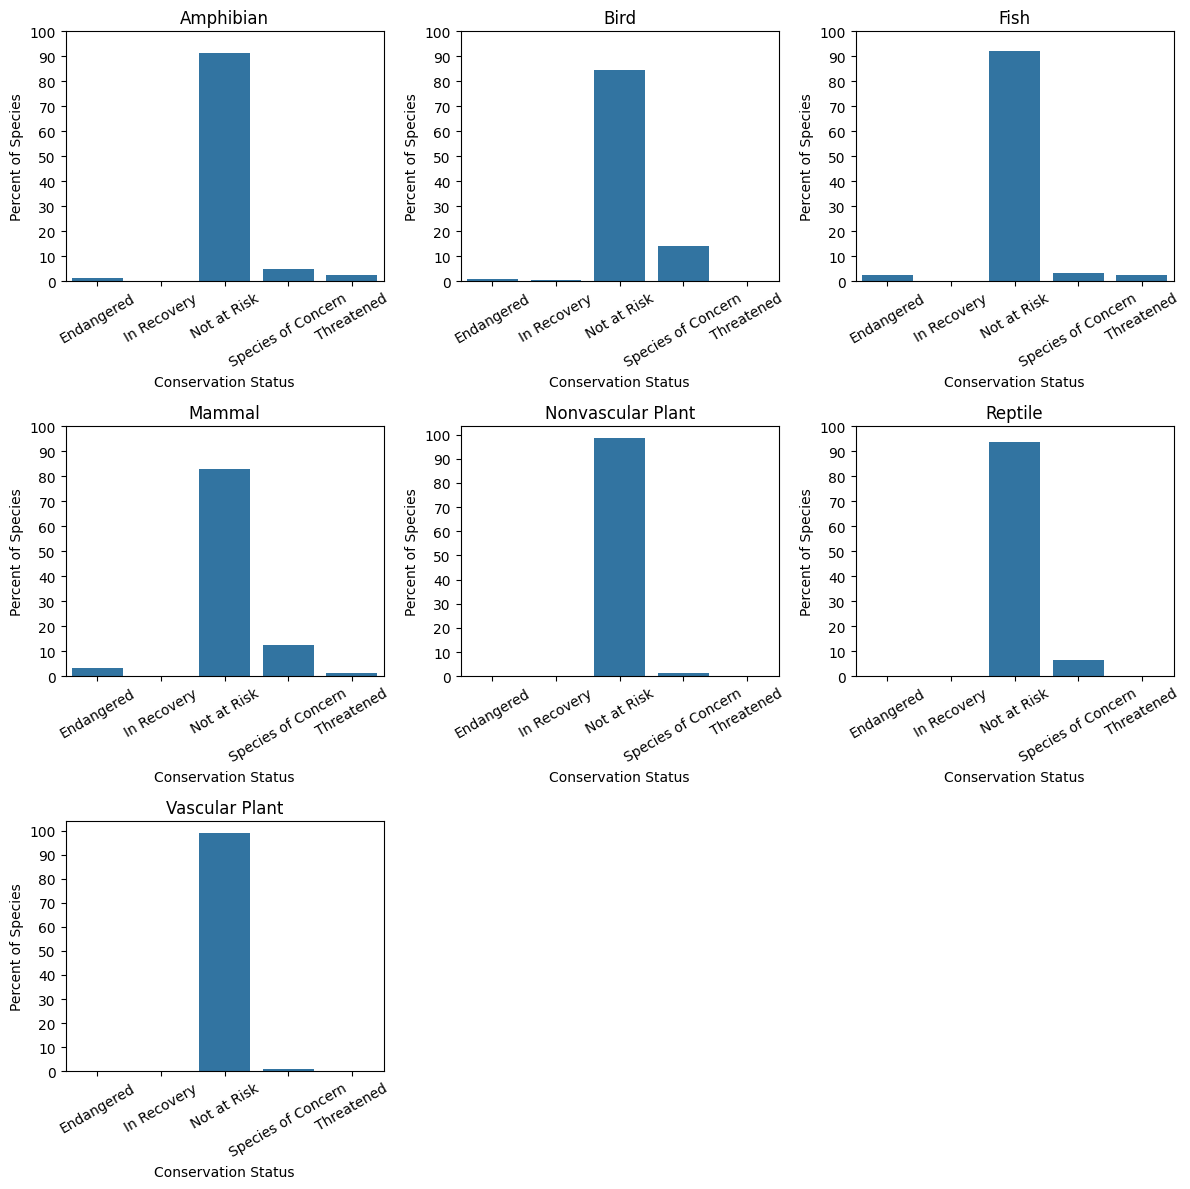

<Figure size 640x480 with 0 Axes>

In [73]:
# 39 (Cont.)

# Plotting the number of species per conservation status within each category

plt.figure(figsize=(12, 12))

for i in range(len(parks_species_cat_pivot_props.index)):
  data = parks_species_cat_pivot_props.iloc[i].reset_index()

  plt.subplot(3, 3, i + 1)
  sns.barplot(x=data[data.columns[0]], y=data[data.columns[1]])
  plt.title(f'{parks_species_cat_pivot.index[i]}')
  plt.xlabel('Conservation Status')
  plt.ylabel('Percent of Species')
  ax = plt.subplot(3, 3, i + 1)
  ax.set_xticks(range(len(data.conservation_status)))
  ax.set_xticklabels(data.conservation_status, rotation=30)
  ax.set_yticks(range(0, 110, 10))
  ax.set_yticklabels(range(0, 110, 10))
  plt.tight_layout()

plt.show()
plt.clf()

Here are some important insights you can take from the pivot tables and visualizations...

- ```Mammals are the most at risk category of species overall with birds being the second most at risk```  
- ```Both Plant categories are the least at risk categories of species```
- ```Mammals and Fish are the most endangered categories with mammals being the most endangered```
- ```Birds and Mammals are the categories of species with the most concern with birds having the highest concern```
- ```Reptiles and Nonvascular Plants have no endangered species within their categories but reptiles have the third highest level of concern```

When analyzing data, it is necessary that one takes multiple approaches to the data to avoid coming to incomplete or false conclusions.  That being said, the next step will be to create another pivot table with proportions, but without the 'Not at Risk' species this time.  This will give you another angle at the data.  The pivot table above is great but the goal is to prevent further endangerment AND the extinction of any species, if possible.  If we went solely off of the pivot table above then we would completely overlook preventative measures for the vascular plants because the amount of species within the category makes them seem free from harm.  

The best course of action is to create both pivot tables and then come to a conclusion.

40. Create the new pivot tables without the 'Not at Risk' species and create some visualizations from the pivot tables

In [74]:
# 40

pk_sp_cat_nar_excluded = pk_sp_nar_excluded[['scientific_name', 'park_name', 'category', 'conservation_status']]

pk_sp_cat_nar_excluded = pk_sp_cat_nar_excluded.drop_duplicates(subset=['scientific_name'])

pk_sp_cat_nar_excluded = pk_sp_cat_nar_excluded.groupby(['category', 'conservation_status']).scientific_name.count().reset_index()

pk_sp_cat_nar_excluded_pivot = pk_sp_cat_nar_excluded.pivot(
    index='category',
    columns='conservation_status',
    values='scientific_name'
)

pk_sp_cat_nar_excluded_pivot.fillna(0.0, inplace=True)

pk_sp_cat_nar_excluded_pivot

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,1.0,0.0,4.0,2.0
Bird,4.0,3.0,68.0,0.0
Fish,3.0,0.0,4.0,3.0
Mammal,6.0,0.0,22.0,2.0
Nonvascular Plant,0.0,0.0,5.0,0.0
Reptile,0.0,0.0,5.0,0.0
Vascular Plant,1.0,0.0,43.0,2.0


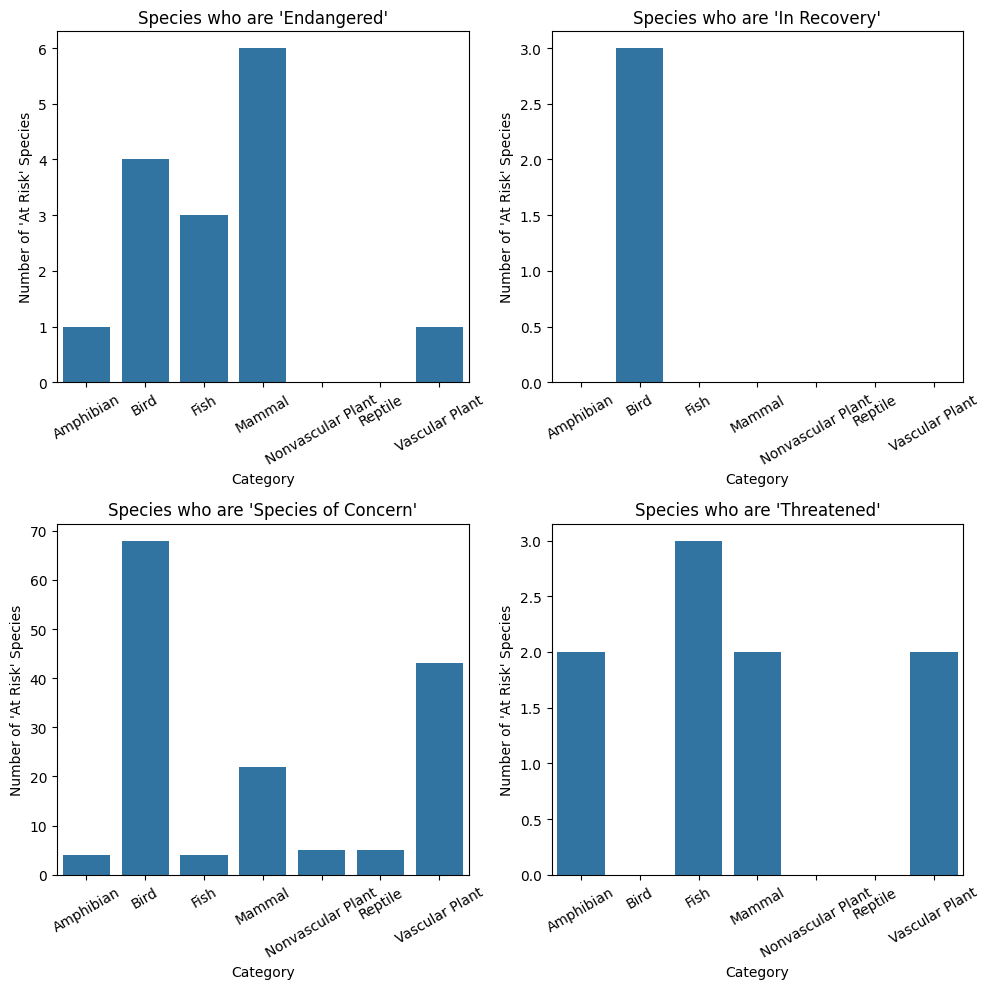

<Figure size 640x480 with 0 Axes>

In [75]:
# 40 (Cont.)

# Plotting the number of species per category within each conservation status

plt.figure(figsize=(10, 10))

for i in range(len(pk_sp_cat_nar_excluded_pivot.columns)):
  data = pk_sp_cat_nar_excluded_pivot[pk_sp_cat_nar_excluded_pivot.columns[i]].reset_index()

  plt.subplot(2, 2, i + 1)
  sns.barplot(x=data[data.columns[0]], y=data[data.columns[1]])
  plt.title(f'Species who are \'{data.columns[1]}\'')
  plt.xlabel('Category')
  plt.ylabel('Number of \'At Risk\' Species')
  ax = plt.subplot(2, 2, i + 1)
  ax.set_xticks(range(len(pk_sp_cat_nar_excluded_pivot.index)))
  ax.set_xticklabels(pk_sp_cat_nar_excluded_pivot.index, rotation=30)
  plt.tight_layout()

plt.show()
plt.clf()

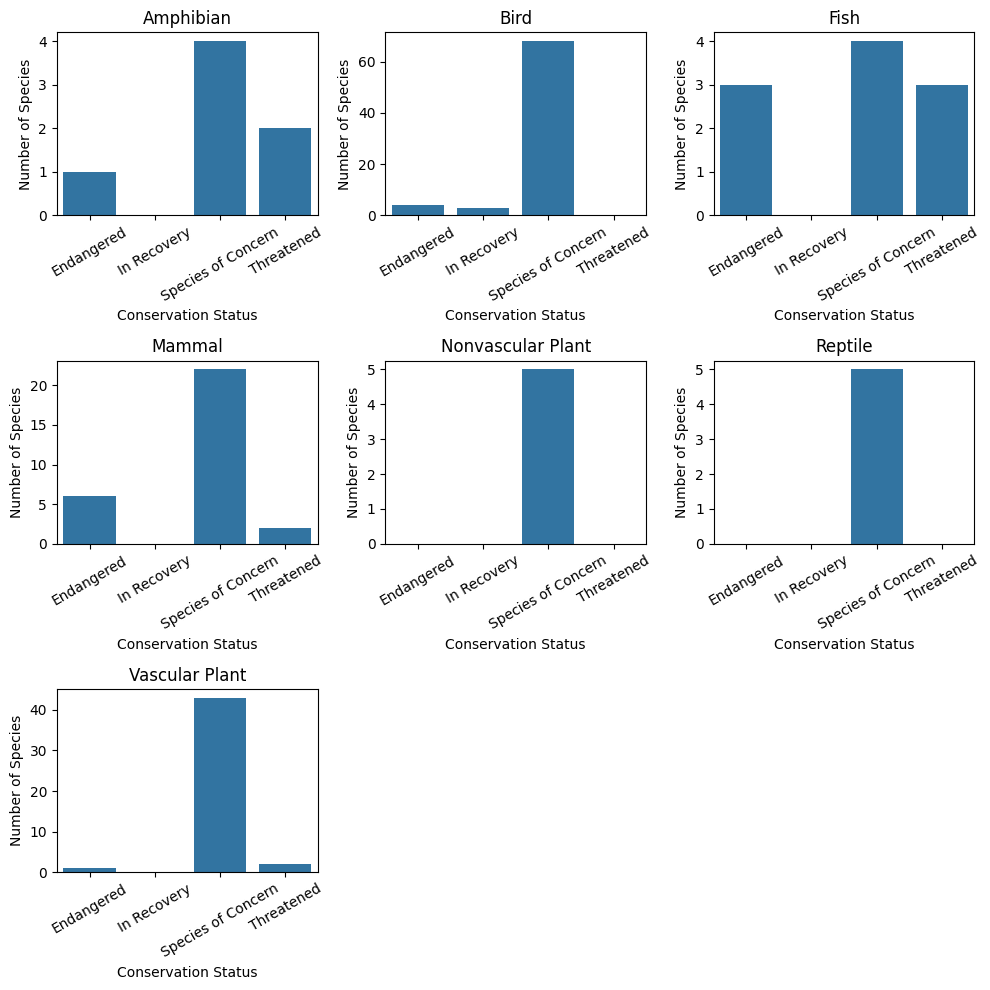

<Figure size 640x480 with 0 Axes>

In [76]:
# 40 (Cont.)

# Plotting the number of species per conservation status within each category

plt.figure(figsize=(10, 10))

for i in range(len(pk_sp_cat_nar_excluded_pivot.index)):
  data = pk_sp_cat_nar_excluded_pivot.iloc[i].reset_index()

  plt.subplot(3, 3, i + 1)
  sns.barplot(x=data[data.columns[0]], y=data[data.columns[1]])
  plt.title(f'{pk_sp_cat_nar_excluded_pivot.index[i]}')
  plt.xlabel('Conservation Status')
  plt.ylabel('Number of Species')
  ax = plt.subplot(3, 3, i + 1)
  ax.set_xticks(range(len(data.conservation_status)))
  ax.set_xticklabels(data.conservation_status, rotation=30)
  plt.tight_layout()

plt.show()
plt.clf()

In [77]:
# 40 (Cont.)

pk_sp_cat_nar_excluded_pivot_props = pk_sp_cat_nar_excluded_pivot.copy()

for cat in pk_sp_cat_nar_excluded_pivot_props.index:

    cat_total = pk_sp_cat_nar_excluded_pivot_props.loc[cat].sum(axis=0)
    print(f'Total {cat} Species: {cat_total}')

    pk_sp_cat_nar_excluded_pivot_props.loc[cat] = pk_sp_cat_nar_excluded_pivot_props.loc[cat].apply(lambda x: str(round((x / cat_total) * 100, 2)) + '%')

pk_sp_cat_nar_excluded_pivot_props

Total Amphibian Species: 7.0
Total Bird Species: 75.0
Total Fish Species: 10.0
Total Mammal Species: 30.0
Total Nonvascular Plant Species: 5.0
Total Reptile Species: 5.0
Total Vascular Plant Species: 46.0


conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,14.29%,0.0%,57.14%,28.57%
Bird,5.33%,4.0%,90.67%,0.0%
Fish,30.0%,0.0%,40.0%,30.0%
Mammal,20.0%,0.0%,73.33%,6.67%
Nonvascular Plant,0.0%,0.0%,100.0%,0.0%
Reptile,0.0%,0.0%,100.0%,0.0%
Vascular Plant,2.17%,0.0%,93.48%,4.35%


When looking at this pivot table, you look past the 'Not at Risk' species and you look directly at the species that are currently 'At Risk'.  This can allow for you, or whoever the analysis is made for, to hone in on a trouble area among a specific category of species.  Both pivot tables can be used for preventative measures but this pivot table gets a closer look at the proportions within each conservation status.

Let's make some visualizations for presentation purposes.

In [78]:
# 40 (Cont.)

# Remove the '%' off of each value in the pivot table and convert values to floats for graphing

for cat in pk_sp_cat_nar_excluded_pivot_props.index:

    pk_sp_cat_nar_excluded_pivot_props.loc[cat] = pk_sp_cat_nar_excluded_pivot_props.loc[cat].apply(lambda x: float(x.strip('%')))

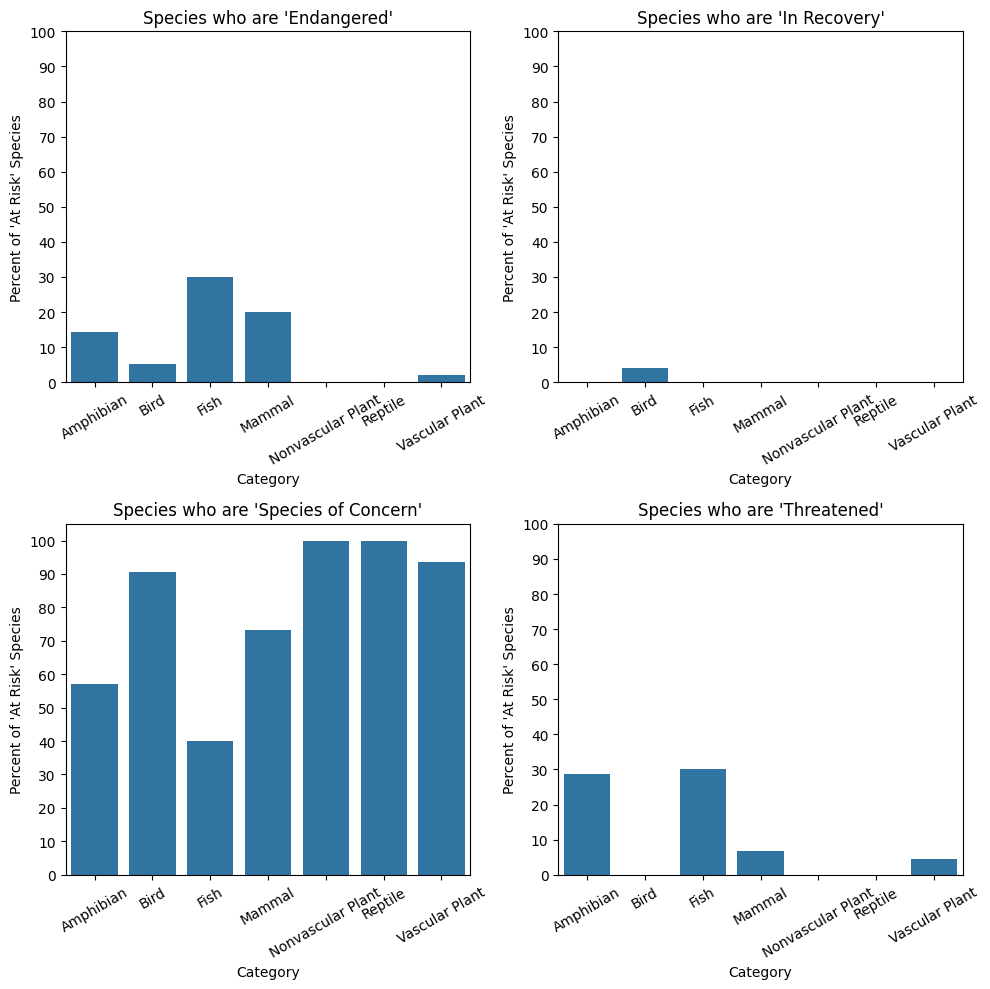

<Figure size 640x480 with 0 Axes>

In [79]:
# 40 (Cont.)

# Plotting the proportions of category within each conservation status

plt.figure(figsize=(10, 10))

for i in range(len(pk_sp_cat_nar_excluded_pivot_props.columns)):
  data = pk_sp_cat_nar_excluded_pivot_props[pk_sp_cat_nar_excluded_pivot_props.columns[i]].reset_index()

  plt.subplot(2, 2, i + 1)
  sns.barplot(x=data[data.columns[0]], y=data[data.columns[1]])
  plt.title(f'Species who are \'{data.columns[1]}\'')
  plt.xlabel('Category')
  plt.ylabel('Percent of \'At Risk\' Species')
  ax = plt.subplot(2, 2, i + 1)
  ax.set_xticks(range(len(pk_sp_cat_nar_excluded_pivot_props.index)))
  ax.set_xticklabels(pk_sp_cat_nar_excluded_pivot_props.index, rotation=30)
  ax.set_yticks(range(0, 110, 10))
  ax.set_yticklabels(range(0, 110, 10))
  plt.tight_layout()

plt.show()
plt.clf()

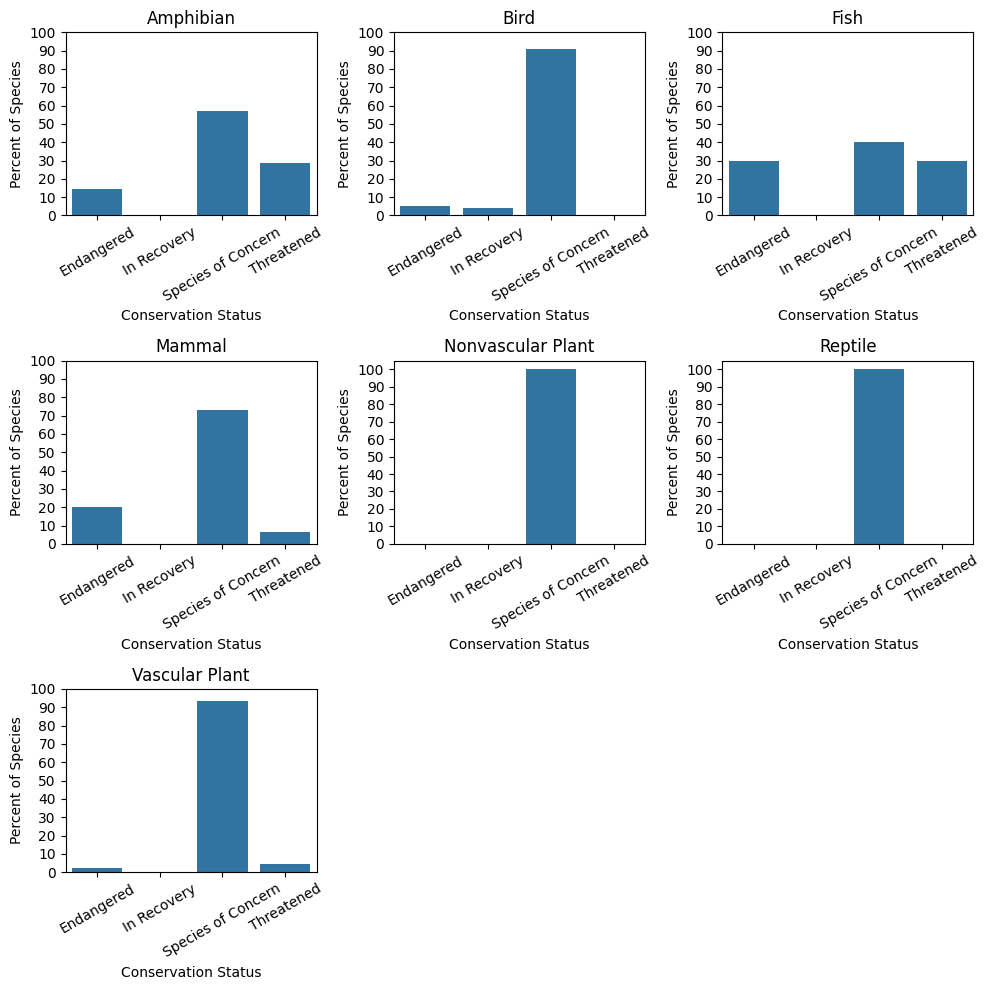

<Figure size 640x480 with 0 Axes>

In [80]:
# 40 (Cont.)

# Plotting the proportions of individual categories conservation statuses

plt.figure(figsize=(10, 10))

for i in range(len(pk_sp_cat_nar_excluded_pivot_props.index)):
  data = pk_sp_cat_nar_excluded_pivot_props.iloc[i].reset_index()

  plt.subplot(3, 3, i + 1)
  sns.barplot(x=data[data.columns[0]], y=data[data.columns[1]])
  plt.title(f'{pk_sp_cat_nar_excluded_pivot_props.index[i]}')
  plt.xlabel('Conservation Status')
  plt.ylabel('Percent of Species')
  ax = plt.subplot(3, 3, i + 1)
  ax.set_xticks(range(len(data.conservation_status)))
  ax.set_xticklabels(data.conservation_status, rotation=30)
  ax.set_yticks(range(0, 110, 10))
  ax.set_yticklabels(range(0, 110, 10))
  plt.tight_layout()

plt.show()
plt.clf()

Some insights from the pivot table and visualizations are listed below.

Among 'At Risk' species...
- ```...Fish have the highest proportion of endangered species (30%) with Mammals being the second highest (20%)```
- ```...If preventative actions are taken, Birds, Reptiles, Vascular Plants and Nonvascular Plants have a much lower chance of moving towards endangerment```
- ```...Species that live primarily in the water (Amphibians and Fish) have higher proportions of endangerment and are more threatened than any other category```

If you hadn't analyzed both pivot tables, then you could've missed out on some very useful information!

Always work to see the data from various angles before jumping to absolute conclusions.

---

# Section 3 - Exploring the Data - Part 4
### _Categories, Parks, and Observations_
The next section of the analysis will look into the category observations and see how they differ from park to park, if they differ at all.

For this section, you won't be using the dataframe that excluded the 'Not at Risk' ```conservation_status``` value since you won't be using that column of the data.

41. Make sure you have the correct dataframe variable to use
42. Manipulate it to be workable for this problem and create a pivot table

In [81]:
# 41

parks_species.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not at Risk
1,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not at Risk
2,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Not at Risk
3,Abutilon theophrasti,Bryce National Park,84,Vascular Plant,Velvetleaf,Not at Risk
4,Githopsis specularioides,Great Smoky Mountains National Park,85,Vascular Plant,Common Bluecup,Not at Risk


In [82]:
# 42

parks_cats = parks_species[['category', 'park_name', 'observations']]

parks_cats = parks_cats.groupby(['category', 'park_name']).observations.sum().reset_index()

parks_cats_pivot = parks_cats.pivot(
    index='park_name',
    columns='category',
    values='observations'
)

parks_cats_pivot

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
park_name,,,,,,,
Bryce National Park,7299,48383,12223,16823,32992,7854,422585
Great Smoky Mountains National Park,5622,35290,9068,12301,24857,5616,318071
Yellowstone National Park,19191,119219,30131,41905,83021,19300,1060769
Yosemite National Park,11309,71290,18353,24887,49783,11335,634515


The numbers are too large to be able to read easily so let's, once again, make a pivot table with proportions instead!

43. Per usual, create a second pivot table containing the proportions of the first pivot table

In [83]:
# 43

parks_cats_pivot_props = parks_cats_pivot.copy()

for park in parks_cats_pivot_props.index:

    park_total = parks_cats_pivot_props.loc[park].sum(axis=0)
    print(f'Total {park} Observations: {park_total}')

    parks_cats_pivot_props.loc[park] = parks_cats_pivot_props.loc[park].apply(lambda x: str(round((x / park_total) * 100, 2)) + '%')

parks_cats_pivot_props

Total Bryce National Park Observations: 548159
Total Great Smoky Mountains National Park Observations: 410825
Total Yellowstone National Park Observations: 1373536
Total Yosemite National Park Observations: 821472


category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
park_name,,,,,,,
Bryce National Park,1.33%,8.83%,2.23%,3.07%,6.02%,1.43%,77.09%
Great Smoky Mountains National Park,1.37%,8.59%,2.21%,2.99%,6.05%,1.37%,77.42%
Yellowstone National Park,1.4%,8.68%,2.19%,3.05%,6.04%,1.41%,77.23%
Yosemite National Park,1.38%,8.68%,2.23%,3.03%,6.06%,1.38%,77.24%


Well, once again, the proportions show that each park is nearly identical in percentage of observations for each category.

For fun, make one last figure of graphs to visualize or pivot table findings.

44. Create a visualization to show the observations of each category in each park

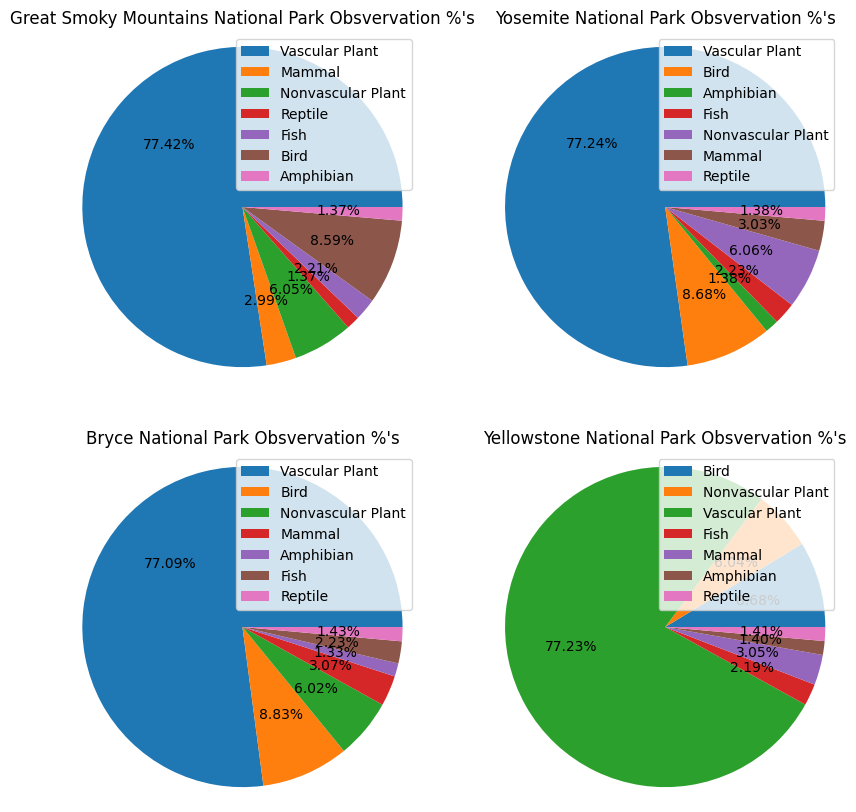

<Figure size 640x480 with 0 Axes>

In [84]:
# 44

plt.figure(figsize=(10, 10))

for i in range(len(parks_species.park_name.unique())):

  cats_parks_df = parks_species[parks_species.park_name == parks_species.park_name.unique()[i]]
  cats_parks_df = cats_parks_df[['category', 'observations']]
  cats_parks_df = cats_parks_df.groupby('category', sort=False).observations.sum()
  labels = cats_parks_df.index

  plt.subplot(2, 2, i + 1)
  plt.pie(cats_parks_df, autopct='%0.2f%%')
  plt.axis('equal')
  plt.title(f'{parks_species.park_name.unique()[i]} Obsvervation %\'s')
  plt.legend(labels, loc='upper right')

plt.show()
plt.clf()


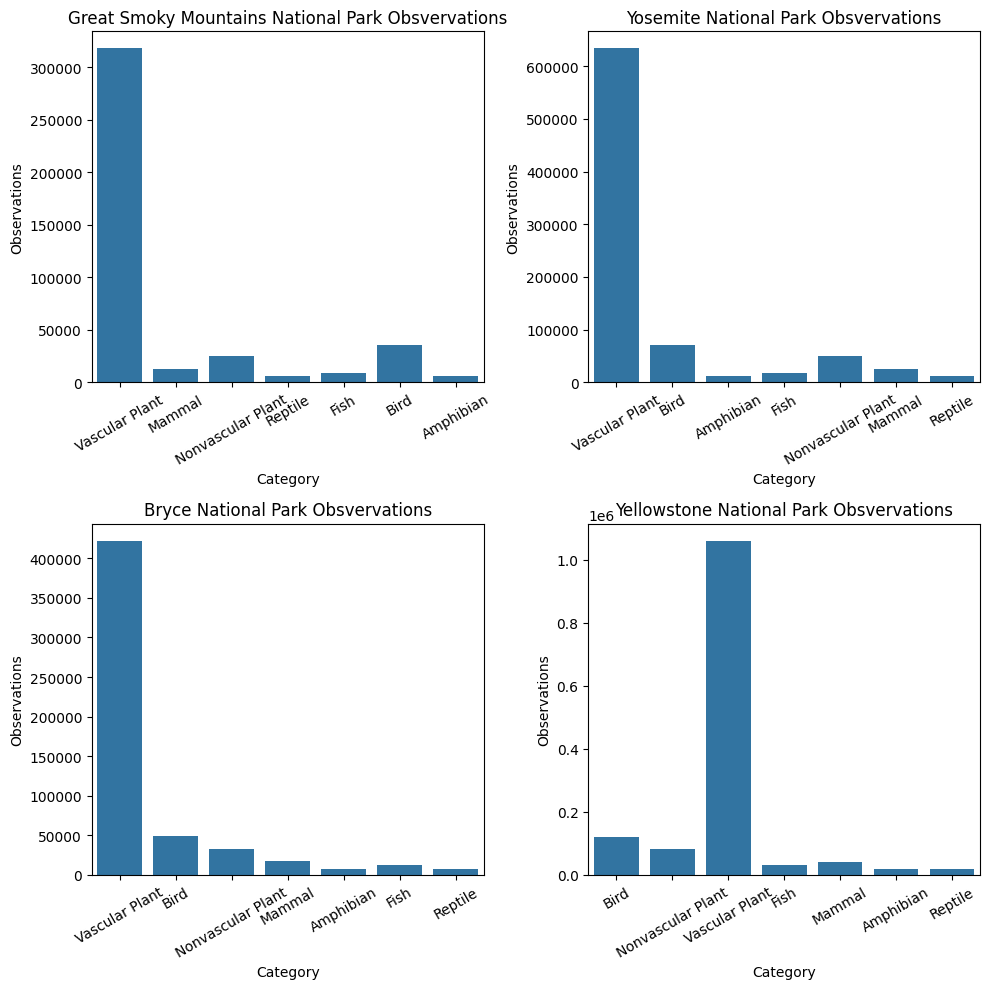

<Figure size 640x480 with 0 Axes>

In [85]:
# 44 (Cont.)

plt.figure(figsize=(10, 10))

for i in range(len(parks_species.park_name.unique())):

  cats_parks_df = parks_species[parks_species.park_name == parks_species.park_name.unique()[i]]
  cats_parks_df = cats_parks_df[['category', 'observations']]
  cats_parks_df = cats_parks_df.groupby('category', sort=False).observations.sum()

  plt.subplot(2, 2, i + 1)
  sns.barplot(x=cats_parks_df.index, y=cats_parks_df)
  plt.title(f'{parks_species.park_name.unique()[i]} Obsvervations')
  plt.xlabel('Category')
  plt.ylabel('Observations')
  ax = plt.subplot(2, 2, i + 1)
  ax.set_xticks(range(len(cats_parks_df.index)))
  ax.set_xticklabels(cats_parks_df.index, rotation=30)
  plt.tight_layout()

plt.show()
plt.clf()

Just as you discovered earlier with the observations of conservation statuses per park, the observations of categories within each park is almost identical in proportion.

---

# Section 4 - Statistical Significance Among Endangered Species
For the final part of the analysis, you'll refer back to some of the pivot tables from earlier and you'll test for statistical significance between categories of endangered species.

45. Take a look at the dataframe you'll be using for the statistical analysis

In [86]:
# 45

parks_species_cat_pivot

conservation_status,Endangered,In Recovery,Not at Risk,Species of Concern,Threatened
category,,,,,
Amphibian,1.0,0.0,72.0,4.0,2.0
Bird,4.0,3.0,413.0,68.0,0.0
Fish,3.0,0.0,115.0,4.0,3.0
Mammal,6.0,0.0,146.0,22.0,2.0
Nonvascular Plant,0.0,0.0,328.0,5.0,0.0
Reptile,0.0,0.0,73.0,5.0,0.0
Vascular Plant,1.0,0.0,4216.0,43.0,2.0


In order to do the test on the endangered species, you'll need know the total species in each category that is not endangered.

46. Add a column to ```parks_species_cat_pivot``` that has the total species for each category that is not endangered

In [87]:
# 46

parks_species_cat_pivot['Total (excluding Endangered)'] = parks_species_cat_pivot['In Recovery'] + \
                                                          parks_species_cat_pivot['Not at Risk'] + \
                                                          parks_species_cat_pivot['Species of Concern'] + \
                                                          parks_species_cat_pivot['Threatened']

parks_species_cat_pivot


conservation_status,Endangered,In Recovery,Not at Risk,Species of Concern,Threatened,Total (excluding Endangered)
category,,,,,,
Amphibian,1.0,0.0,72.0,4.0,2.0,78.0
Bird,4.0,3.0,413.0,68.0,0.0,484.0
Fish,3.0,0.0,115.0,4.0,3.0,122.0
Mammal,6.0,0.0,146.0,22.0,2.0,170.0
Nonvascular Plant,0.0,0.0,328.0,5.0,0.0,333.0
Reptile,0.0,0.0,73.0,5.0,0.0,78.0
Vascular Plant,1.0,0.0,4216.0,43.0,2.0,4261.0


Now, with the number of endangered species and the number of total species, you can run a chi-squared test by using the ```scipy.stats``` import.

This test will test if the differences in rates of endangerment amongst categories of species is statistically significant or not.

Let's run the test on the most endangered category of species against every other category to find out which ones are significantly different or not.

47. Check proportions pivot table to see which category has the highest percent of endangerment

In [88]:
# 47

# To better read the table, run a loop to reapply the '%' sign to each value in the table

for cat in parks_species_cat_pivot_props.index:

  parks_species_cat_pivot_props.loc[cat] = parks_species_cat_pivot_props.loc[cat].apply(lambda x: str(x) + '%')

parks_species_cat_pivot_props

conservation_status,Endangered,In Recovery,Not at Risk,Species of Concern,Threatened
category,,,,,
Amphibian,1.27%,0.0%,91.14%,5.06%,2.53%
Bird,0.82%,0.61%,84.63%,13.93%,0.0%
Fish,2.4%,0.0%,92.0%,3.2%,2.4%
Mammal,3.41%,0.0%,82.95%,12.5%,1.14%
Nonvascular Plant,0.0%,0.0%,98.5%,1.5%,0.0%
Reptile,0.0%,0.0%,93.59%,6.41%,0.0%
Vascular Plant,0.02%,0.0%,98.92%,1.01%,0.05%


The ```Mammal``` category has the highest percent of endangered species, so you'll test mammals against every other category in the chi-squared test.

If the p-value in the chi-squared test is less than 0.05, then that test is statistically significant.

48. Run the chi-squared tests

In [89]:
# 48

for cat in parks_species_cat_pivot.index:

    if cat == 'Mammal':
        continue

    contingency = [[6, 170],
                   [parks_species_cat_pivot.loc[cat].Endangered, parks_species_cat_pivot.loc[cat]['Total (excluding Endangered)']]]
    p_val = ss.chi2_contingency(contingency)[1]
    print(f'{cat} P-Value: {round(p_val, 4)}')
    if p_val < 0.05:
        print(f'The difference in the rate of endangerment between Mammals and {cat}(s) is statistically significant\n')
    else:
        print(f'The difference in the rate of endangerment between Mammals and {cat}(s) is NOT statistically significant\n')

Amphibian P-Value: 0.5795
The difference in the rate of endangerment between Mammals and Amphibian(s) is NOT statistically significant

Bird P-Value: 0.0397
The difference in the rate of endangerment between Mammals and Bird(s) is statistically significant

Fish P-Value: 0.8704
The difference in the rate of endangerment between Mammals and Fish(s) is NOT statistically significant

Nonvascular Plant P-Value: 0.0031
The difference in the rate of endangerment between Mammals and Nonvascular Plant(s) is statistically significant

Reptile P-Value: 0.2292
The difference in the rate of endangerment between Mammals and Reptile(s) is NOT statistically significant

Vascular Plant P-Value: 0.0
The difference in the rate of endangerment between Mammals and Vascular Plant(s) is statistically significant



After running the chi-squared tests, we have the p-values which help us understand the significance of the differences in endangerment rates.

The results show that three categories have a statistically significant difference in their endangerment rates when compared to Mammals:
- Birds
- Nonvascular Plants
- Vascular Plants

A statistically significant difference (with a p-value less than 0.05) means that the observed difference in endangerment rates between Mammals and these three categories is unlikely to be due to random chance. In other words, based on this data, Mammals have a significantly higher rate of endangerment compared to Birds, Nonvascular Plants, and Vascular Plants.

This conclusion is drawn with a 95% confidence level (p-value < 0.05). This implies that in less than 5% of random samples from this population would we observe an endangerment rate in Mammals that is not higher than that in these three categories. Conversely, in more than 95% of random samples, the endangerment rate among mammals would be higher than that of these three categories.


---

## Section 5: Summary of Findings and Conclusions

### Analysis Findings

*Overall Trends:*
- Despite considerable variations in total observation counts per park, the relative proportions of observations across different conservation statuses are remarkably consistent in each park.
- Similarly, the distribution of observations across species categories remains relatively uniform across all parks.
- A clear inverse relationship exists between the severity of a species' conservation status and its average observation count; as conservation status worsens, observations tend to decrease.
- The number of observations for a species can potentially serve as an indicator of its conservation status (higher observations suggesting lower risk, and lower observations indicating higher risk).

*Insights into 'At Risk' vs. 'Not at Risk' Species:*
- Plant categories (Vascular and Nonvascular) have the lowest proportion of species classified as 'At Risk'.
- Birds exhibit the highest proportion of species designated as a 'Species of Concern'.
- The Reptile and Nonvascular Plant categories do not contain any endangered species in this dataset.
- Mammals have the highest proportion of species that are 'At Risk' and, specifically, the highest proportion of endangered species.

*Detailed Findings on 'At Risk' Species:*
- Among the 'At Risk' groups, Fish have the highest proportion of endangered species.
- Aquatic species, including Amphibians and Fish, show elevated rates of endangerment and are generally more threatened compared to other categories. (Amphibians rank third in endangerment proportion after Mammals).
- Birds, Reptiles, Vascular Plants, and Nonvascular Plants have a substantial proportion of species listed as a 'Species of Concern' and a comparatively low proportion of endangered species. This highlights these groups as potential targets for preventative conservation actions.

*Observations on 'Not at Risk' Species:*
- Vascular plants represent a significant majority (approximately 77%) of all species not classified as 'At Risk'.

*Statistical Conclusions:*
- Statistical analysis confirms that Mammals have a significantly higher rate of endangerment compared to Birds, Nonvascular Plants, and Vascular Plants (with a confidence level exceeding 95%).